# Advanced Regression Assignment
> Build a regularized regression model to understand the most important variables to predict the house prices in Australia.


## Problem Statement Part I
> A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
>
> The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
>
> The company wants to know:
> - Which variables are significant in predicting the price of a house, and
> - How well those variables describe the price of a house.
>   
> Also, determine the optimal value of lambda for ridge and lasso regression.


## Business Goal
> You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


In [2]:
# Import the required python libraries


import pandas as pd 
import numpy as np 

import seaborn as sns

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt 
%matplotlib inline


#Supress warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Step 1 - Read the data

In [3]:
# reading the data from csv file
df = pd.read_csv("train.csv")

# display or check the initial 5 rows using head() method
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
# check the shape of our dataset shape property of df

print("Dimension-",df.shape)

print("Total Rows- ", df.shape[0])
print("Total Columns- ", df.shape[1])

Dimension- (1460, 81)
Total Rows-  1460
Total Columns-  81


In [5]:
# trying to understand the data of our dataset using info() method 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Step 2 - Data imputation or Handling missing values & null values

In [6]:
# check total null values in dataset using isnull() method

df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### Upon reviewing the information about our dataset, it appears that certain columns contain 'NA' as a value, which can be seen as missing data by the pandas library. These columns are categorical, and their 'NA' values signify specific situations such as 'No alley access,' 'No Basement,' 'No Fireplace,' 'No Garage,' 'No Pool,' 'No Fence,' and 'None' for 'MiscFeature.'

These columns indicate specific features of the houses:

- 'Alley'- NA means 'No alley access.'
- 'BsmtQual,' 'BsmtCond,' 'BsmtExposure,' 'BsmtFinType1,' and 'BsmtFinType2'- NA means 'No Basement.'
- 'FireplaceQu'- NA means to 'No Fireplace.'
- 'GarageType,' 'GarageFinish,' 'GarageQual,' and 'GarageCond'- NA means 'No Garage.'
- 'PoolQC'- NA represents 'No Pool.'
- 'Fence'- NA indicates 'No Fence.'
- 'MiscFeature'- NA signifies 'None.

To handle this, we plan to replace these 'NA' values with 'None.' However, before making this change, we'll need to reload the file, setting the 'keep_default_na' option to False.


In [7]:
# Read the csv file again and prevent the "NA" to be considered as "NaN" for that we are going to pass "False" value to keep_default_na parameter of read_csv() method of pandas

df = pd.read_csv("train.csv", keep_default_na=False)

# Read the top 5 records or rows of dataset
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [8]:
# Now we are going to replace "NA" values by "None" for the columns-
# "Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FirePlaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature"
# using replace() method and Check top 5 records using head() method

df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave  None      Reg   
1   2          20       RL          80     9600   Pave  None      Reg   
2   3          60       RL          68    11250   Pave  None      IR1   
3   4          70       RL          60     9550   Pave  None      IR1   
4   5          60       RL          84    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [9]:
# Check the information of dataset after replacing 'NA' with 'None'

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

#### Upon inspecting the data types across all columns and cross-referencing them with the data descriptions for each column, it's apparent that certain columns require adjustments in their data types.

Below are the columns which require data type conversion-
- LotFrontage and MasVnrArea needs to convert into to numeric type.
- MSSubClass, OverallQual, OverallCond need to convert into object type


In [10]:
## Convert "LotFrontage" and "MasVnrArea" to "numeric" type as we discussed

df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [11]:
## Convert "MSSubClass", "OverallQual", "OverallCond" to object type as we discussed 
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [12]:
# now we need to make sure the type conversion of all 5 columns 

df[['LotFrontage','MasVnrArea','MSSubClass', 'OverallQual', 'OverallCond']].dtypes

LotFrontage    float64
MasVnrArea     float64
MSSubClass      object
OverallQual     object
OverallCond     object
dtype: object

In [13]:
# it seems the type conversion of all 5 columns are successfull now we need to check the statistical information of all the numerical columns using describe() method

df.describe()

Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1201.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    70.049958   10516.828082  1971.267808   1984.865753   
std     421.610009    24.284752    9981.264932    30.202904     20.645407   
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    59.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    69.000000    9478.500000  1973.000000   1994.000000   
75%    1095.250000    80.000000   11601.500000  2000.000000   2004.000000   
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452   
std     181.066207   456.098091   161.319273   441.866955   438.705324   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   223.000000   795.750000   
50%       0.000000   383.500000     0.000000   477.500000   991.500000   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   
mean   1162.626712   346.992466      5.844521  1515.463699      0.425342   
std     386.587738   436.528436     48.623081   525.480383      0.518911   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
25%     882.000000     0.000000      0.000000  1129.500000      0.000000   
50%    1087.000000     0.000000      0.000000  1464.000000      0.000000   
75%    1391.250000   728.000000      0.000000  1776.750000      1.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean       0.057534     1.565068     0.382877      2.866438      1.046575   
std        0.238753     0.550916     0.502885      0.815778      0.220338   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       6.517808     0.613014     1.767123   472.980137    94.244521   
std        1.625393     0.644666     0.747315   213.804841   125.338794   
min        2.000000     0.000000     0.000000     0.000000     0.000000   
25%        5.000000     0.000000     1.000000   334.500000     0.000000   
50%        6.000000     1.000000     2.000000   480.000000     0.000000   
75%        7.000000     1.000000     2.000000   576.000000   168.000000   
max       14.000000     3.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000     0.00

#### There is a notable disparity between the mean and median values of certain variables such as 2ndFlrSF, indicating skewed distributions for these variables

In [14]:
# lets check for missing values now

df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

##### After looking at above missing values we can see there are total 2 columns which are having missing values:
- 1. LotFrontage - 259 missing values
- 2. MasVnrArea - 8 missing values

## Step 3 - EDA & Visualization

- #### Step 3.1 - Univariate Analysis


<Axes: xlabel='SalePrice', ylabel='Density'>

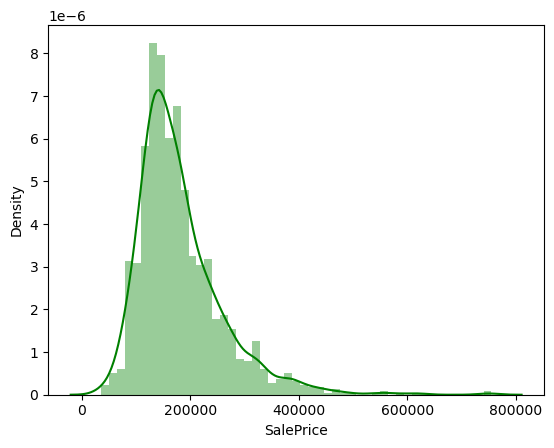

In [15]:
# our target variable is "SalePrice" so lets analyse the target variable first

plt.figure()                  
sns.distplot(df['SalePrice'], color="g")

#### We can see the above plot and we can say that SalePrice which is our target variable is right-skewed

In [16]:
# We need to check skewness of target variable using skew() method

df['SalePrice'].skew()

1.8828757597682129

#### The target variable 'SalePrice' is highly skewed on the basis of above value 1.8828757597682129 which is greater than 1  

In [17]:
# as we checked the skewness we need to check the kurtosis(peakness of target variable) of our target varible using kurt() method

df['SalePrice'].kurt()

6.536281860064529

#### The target variable 'SalePrice' is highly peaked on the basis of above value 6.536281860064529 which is greater than 1

#### Now to reduced the highly skewed and peaked value we will do the log transform our target variable 'SalePrice'

In [18]:
# We are doing log transform the 'SalePrice' column which is our target variable using log method of numpy library

df['SalePrice'] = np.log(df['SalePrice'])

#### After log transform we need to check the skewness and peakness of our target variable using skew() and kurt() method

In [19]:
# check skewness of target variable 

df['SalePrice'].skew()

0.12133506220520406

In [20]:
df['SalePrice'].kurt()

0.8095319958036296

#### After log transform we can see both skewness and kurtosis(peakness) reduced to below 1 and the latest values are skewness = 0.12133506220520406 and kurtosis(peakness) = 0.8095319958036296

<Axes: xlabel='SalePrice', ylabel='Density'>

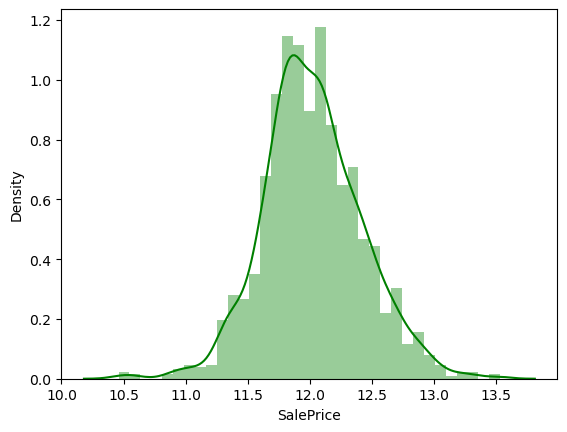

In [21]:
# lets analyse the target variable first after log transformed target variable

plt.figure()
sns.distplot(df['SalePrice'], color="g")

#### Now, we can see our target variable have the normal distribution 

In [22]:
# for EDA we need to indetify numerical and categorical columns 

# get the numerical columns

df_numerical = df.select_dtypes(include=['int64','float64'])

# check the top 5 records of numerical dataset

df_numerical.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       2003          2003       196.0         706   
1   2         80.0     9600       1976          1976         0.0         978   
2   3         68.0    11250       2001          2002       162.0         486   
3   4         60.0     9550       1915          1970         0.0         216   
4   5         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2         548           0   
1             1             6           1           2         460         298   
2             1             6           1           2         608           0   
3             1             7           1           3         642           0   
4             1             9           1           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008  12.247694  
1       5    2007  12.109011  
2       9    2008  12.317167  
3       2    2006  11.849398  
4      12    2008  12.429216

In [23]:
# get the categorical columns

df_categorical = df.select_dtypes(include='object')

# check the top 5 records of categorical dataset

df_categorical.head()


MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave  None      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave  None      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave  None      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave  None      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave  None      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0           7           5     Gable  CompShg     VinylSd     VinylSd   
1           6           8     Gable  CompShg     MetalSd     MetalSd   
2           7           5     Gable  CompShg     VinylSd     VinylSd   
3           7           5     Gable  CompShg     Wd Sdng     Wd Shng   
4           8           5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    BrkFace        Gd        TA      PConc       Gd       TA           No   
1       None        TA        TA     CBlock       Gd       TA           Gd   
2    BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3       None        TA        TA     BrkTil       TA       Gd           No   
4    BrkFace        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0          GLQ          Unf    GasA        Ex          Y      SBrkr   
1          ALQ          Unf    GasA        Ex          Y      SBrkr   
2          GLQ          Unf    GasA        Ex          Y      SBrkr   
3          ALQ          Unf    GasA        Gd          Y      SBrkr   
4          GLQ          Unf    GasA        Ex          Y      SBrkr   

  KitchenQual Functional FireplaceQu GarageType GarageYrBlt GarageFinish  \
0          Gd        Typ        None     Attchd        2003          RFn   
1          TA        Typ          TA     Attchd        1976          RFn   
2          Gd        Typ          TA     Attchd        2001          RFn   
3          Gd        Typ          Gd     Detchd        1998          Unf   
4          Gd        Typ          TA     Attchd        2000          RFn   

  GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature SaleType  \
0         TA         TA          Y   None  None        None       WD   
1         TA         TA          Y   None  None        None       WD   
2         TA         TA          Y   None  None        None       WD   
3         TA         TA          Y   None  None        None       WD   
4         TA         TA          Y   None  None        None       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

#### EDA (Data Visualization & Analysis) of all numerical columns

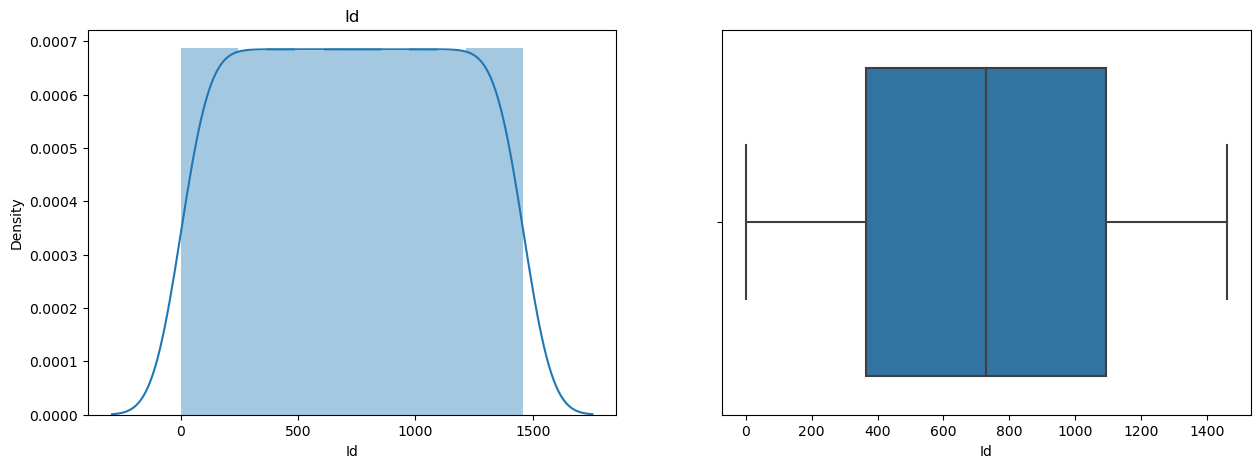

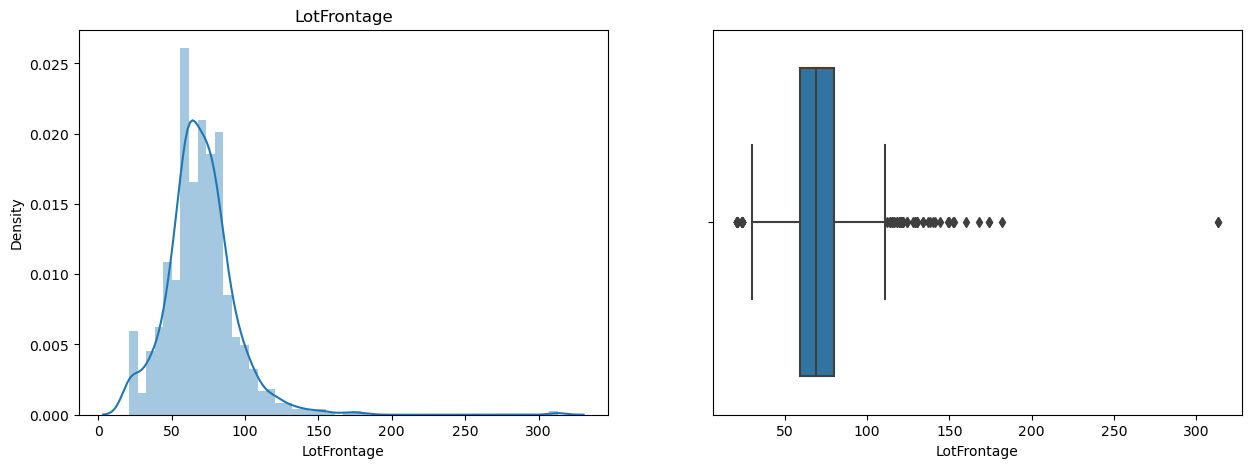

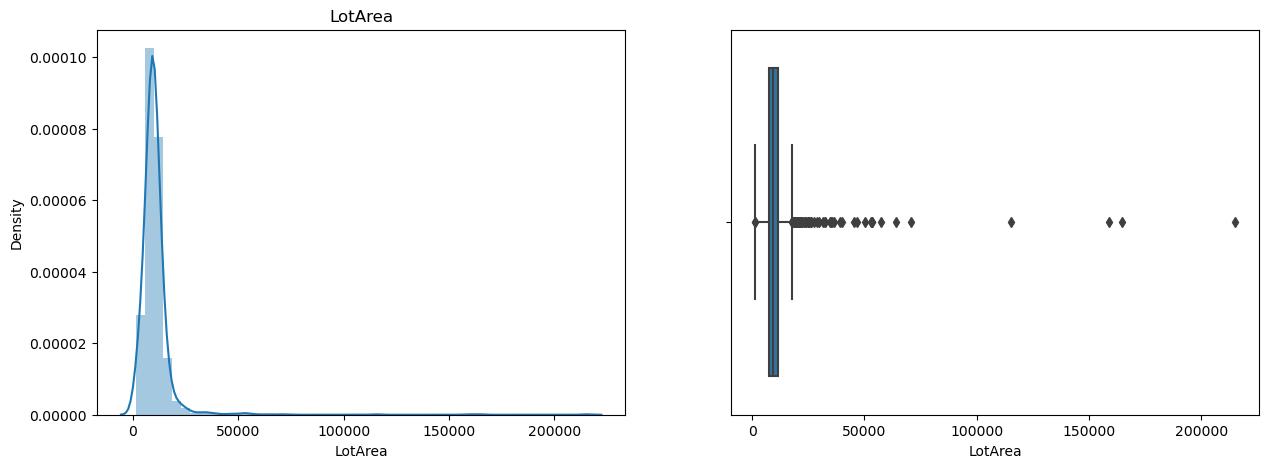

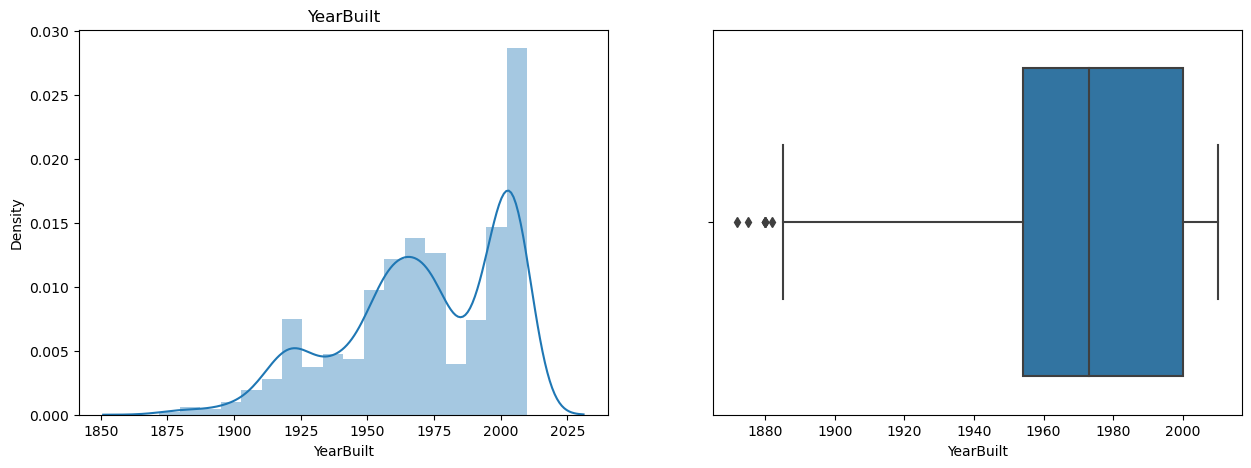

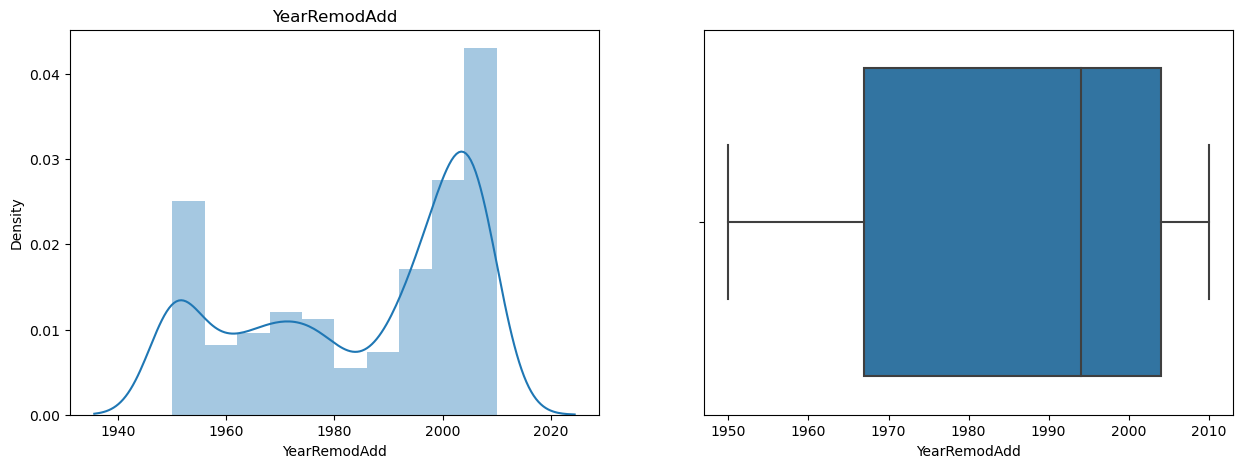

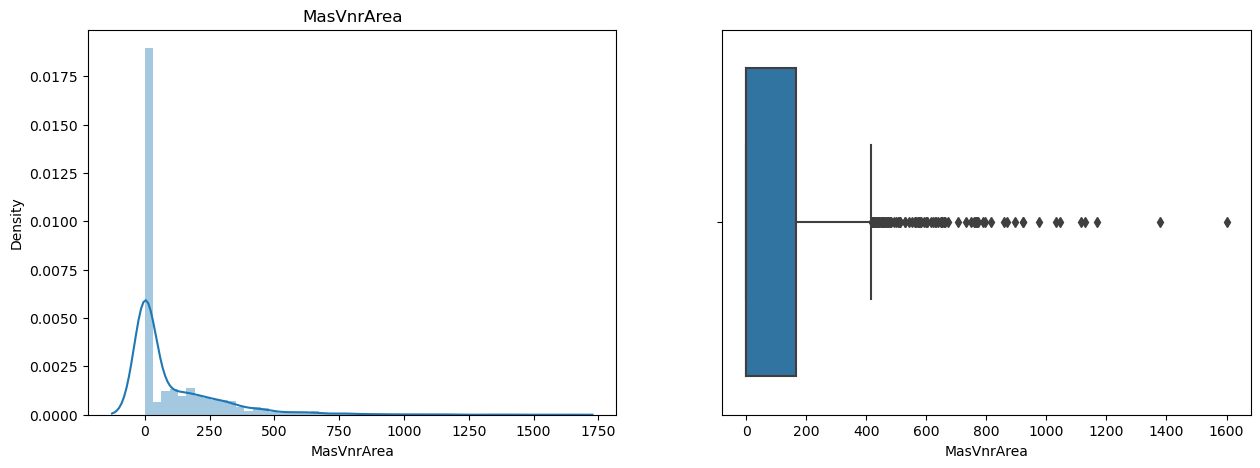

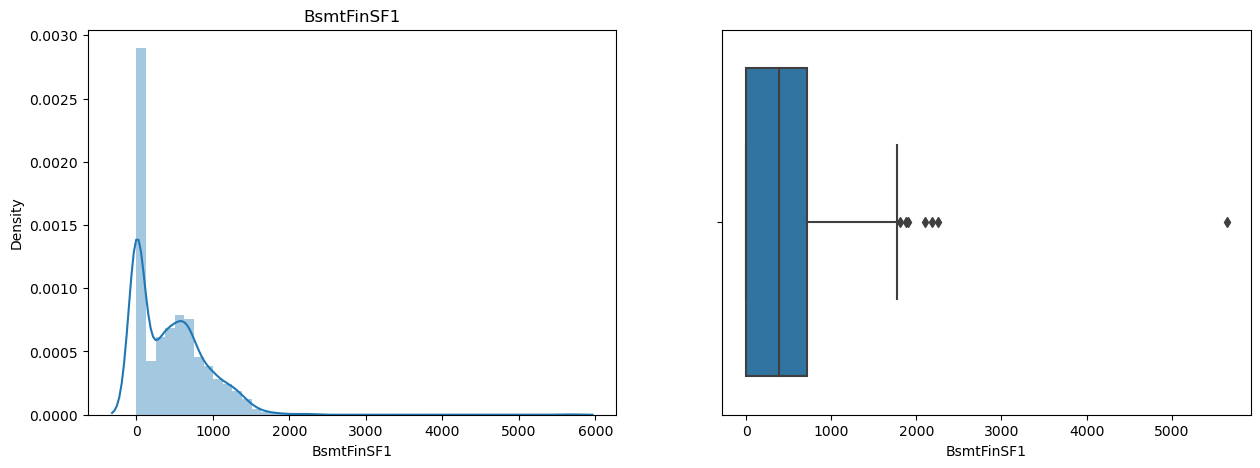

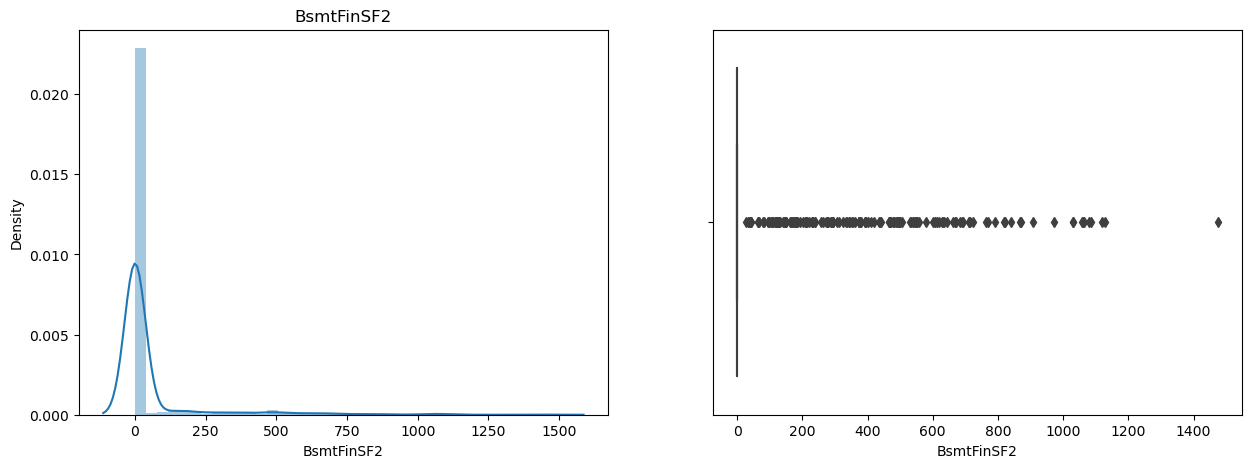

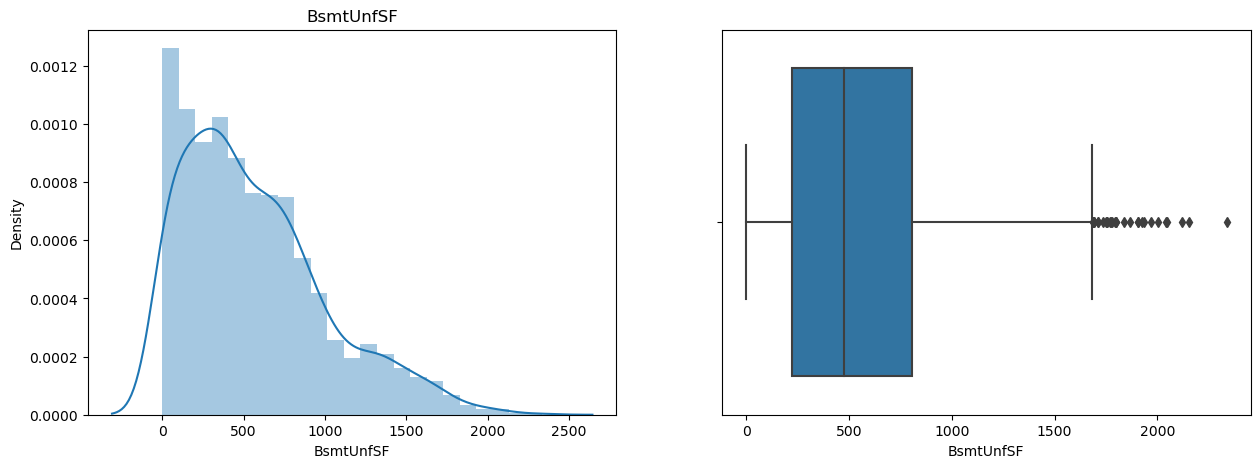

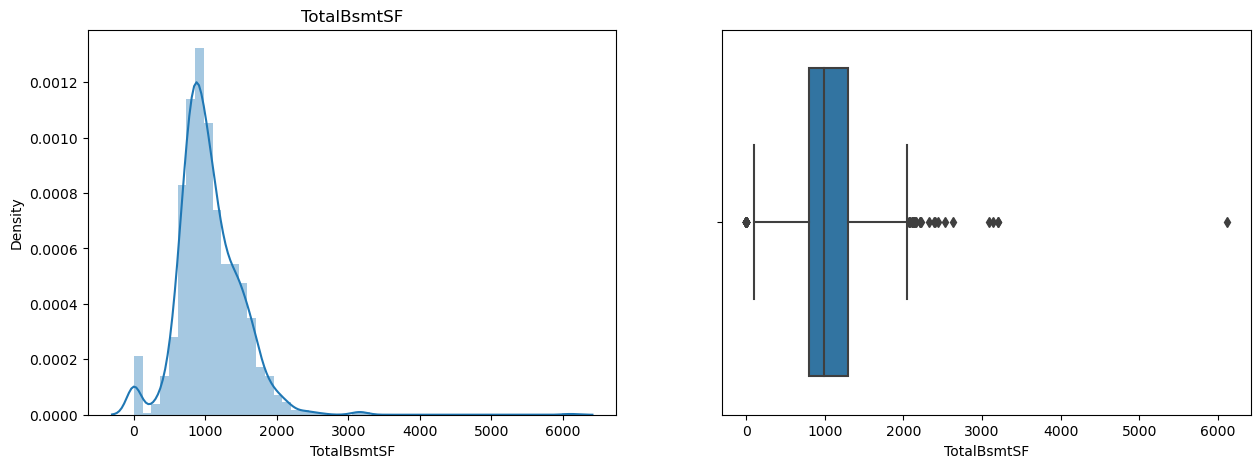

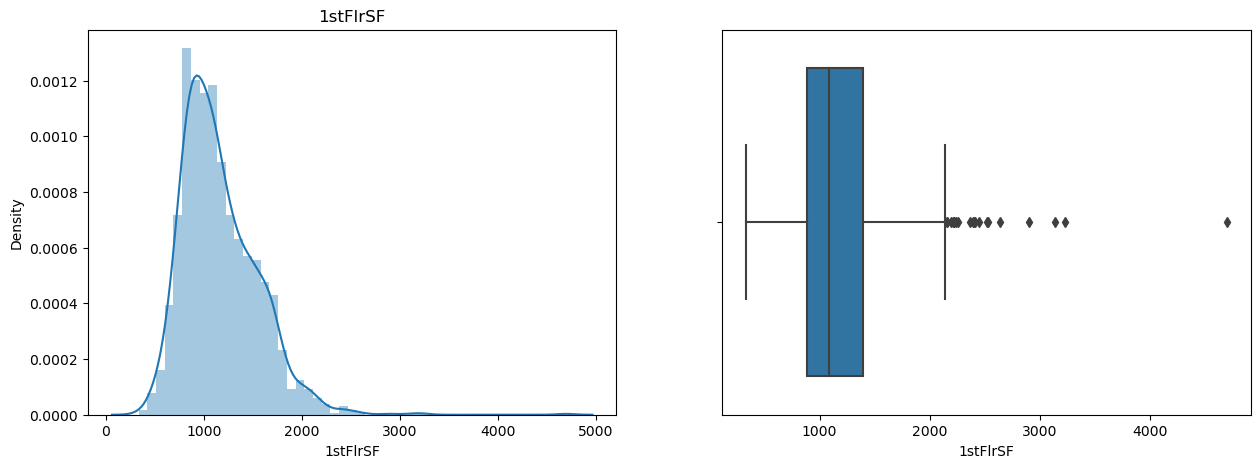

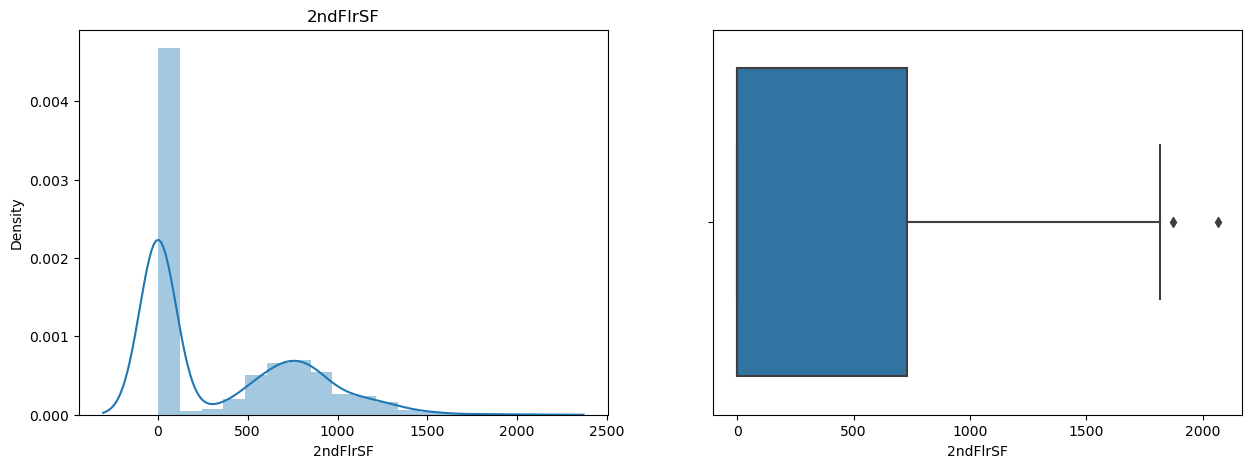

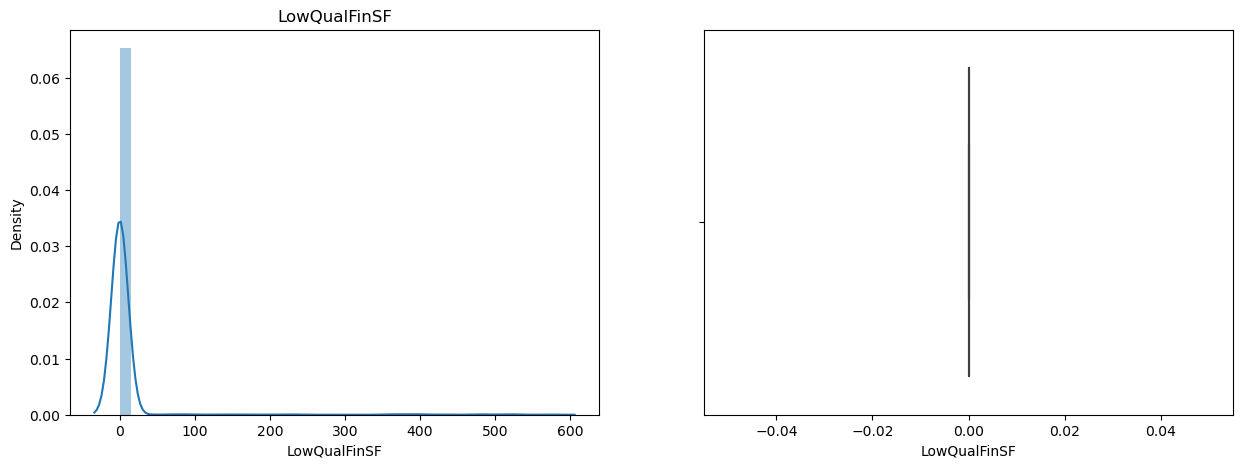

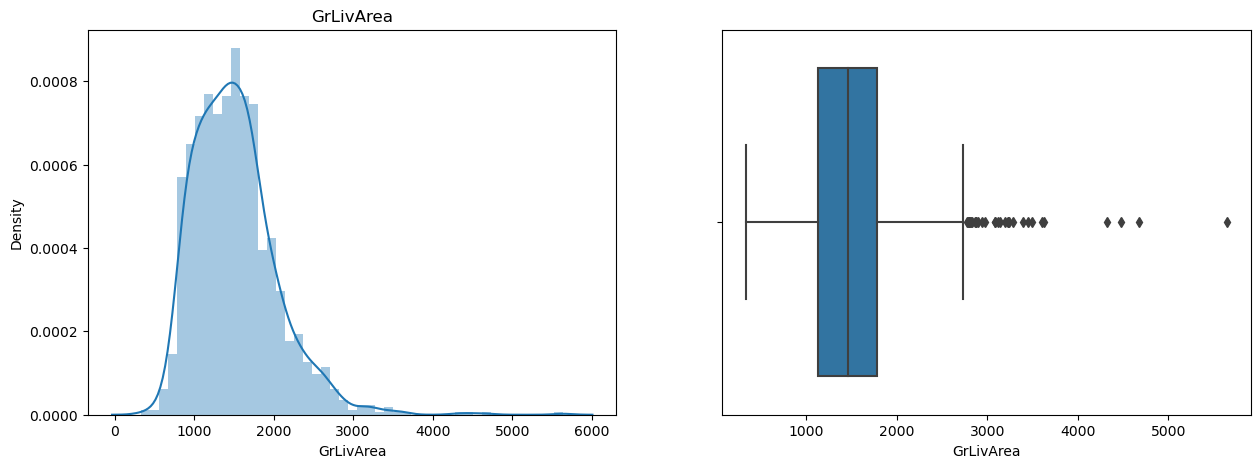

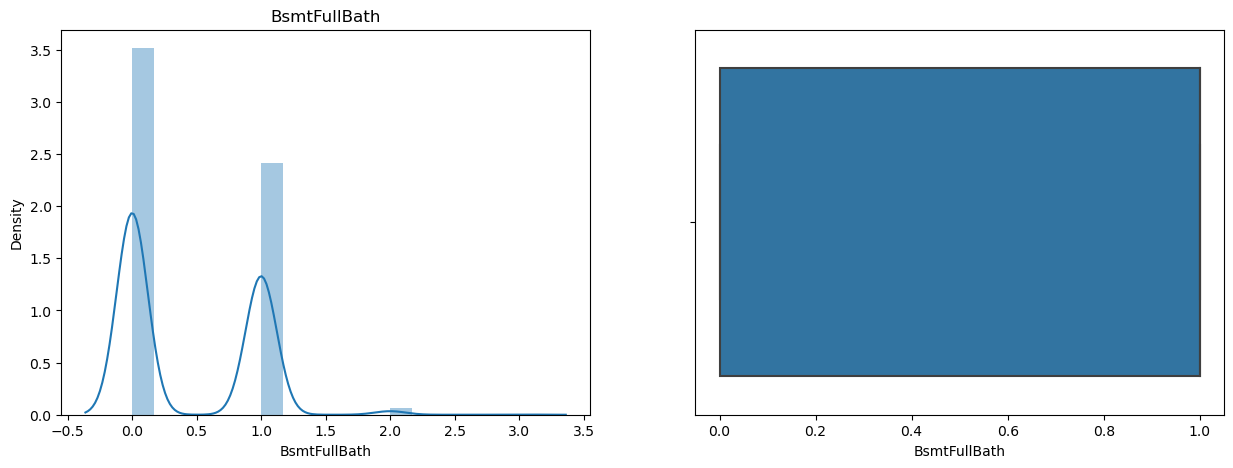

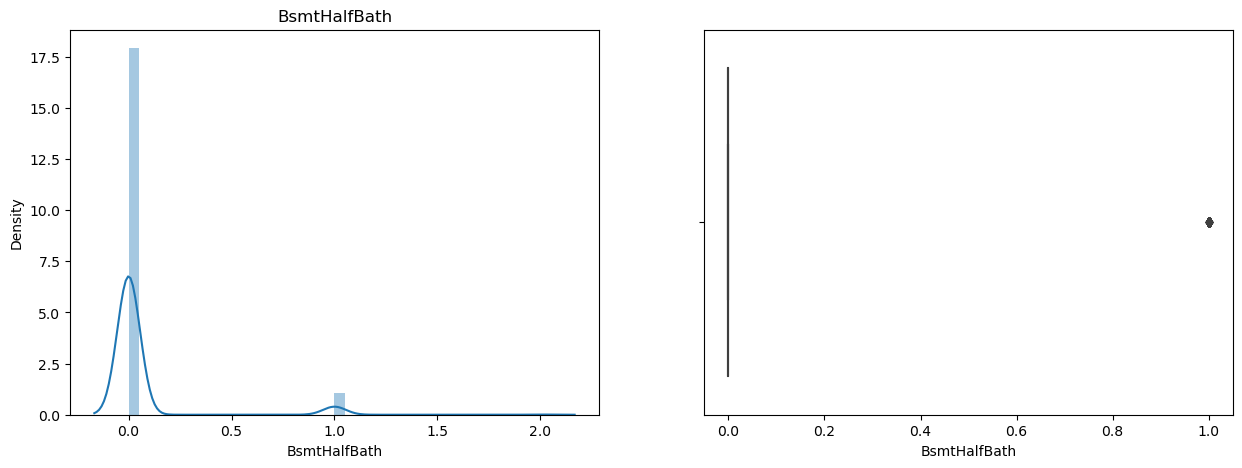

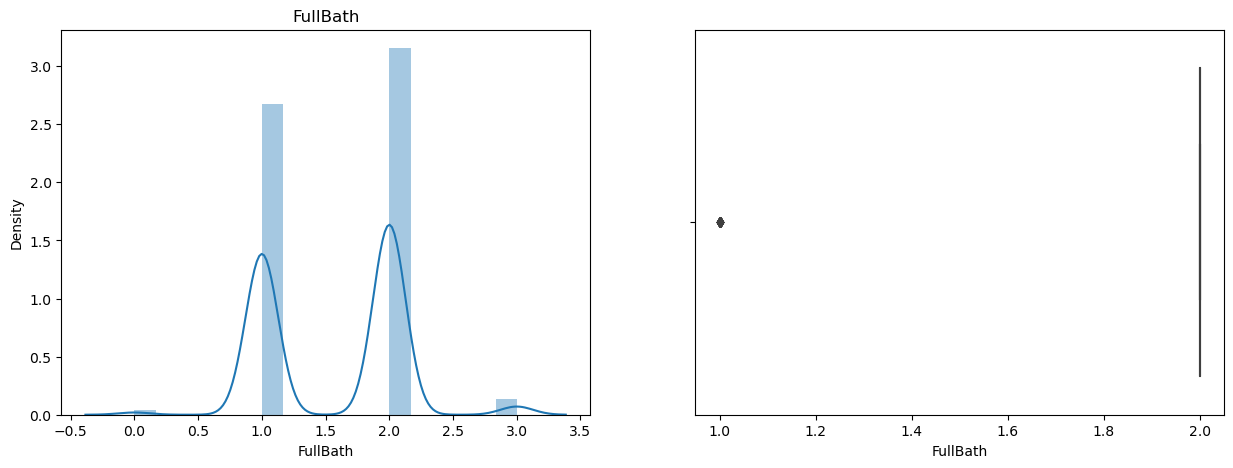

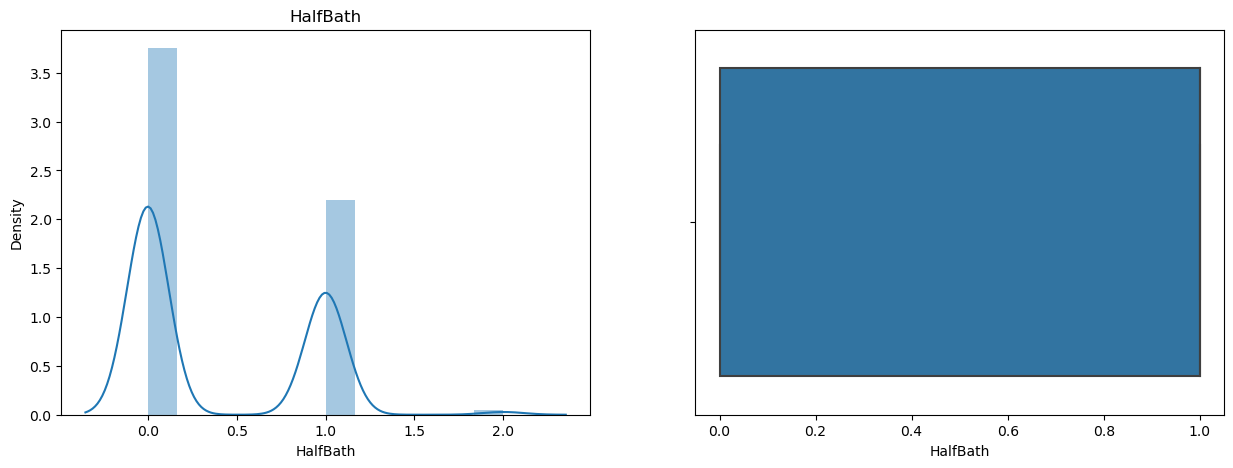

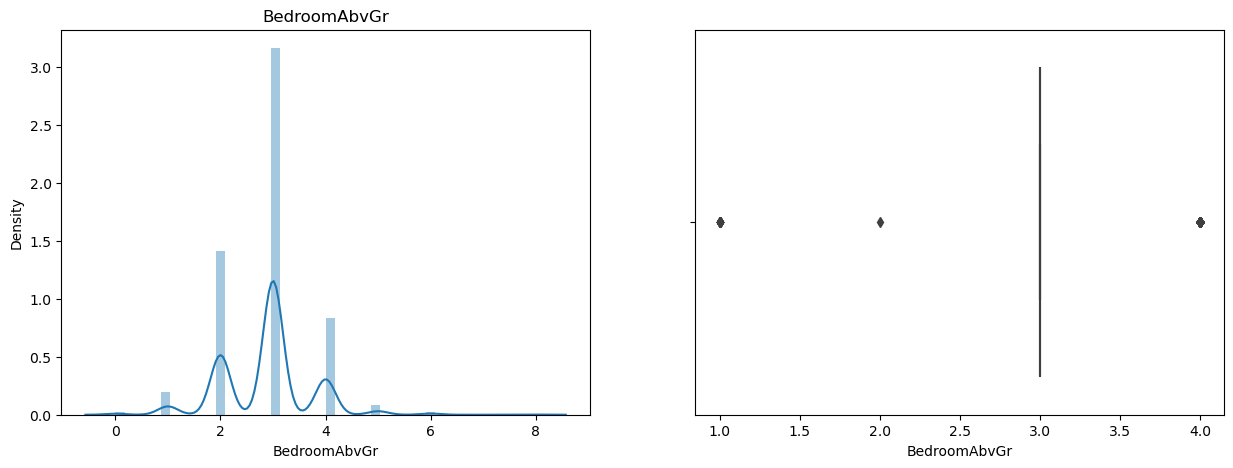

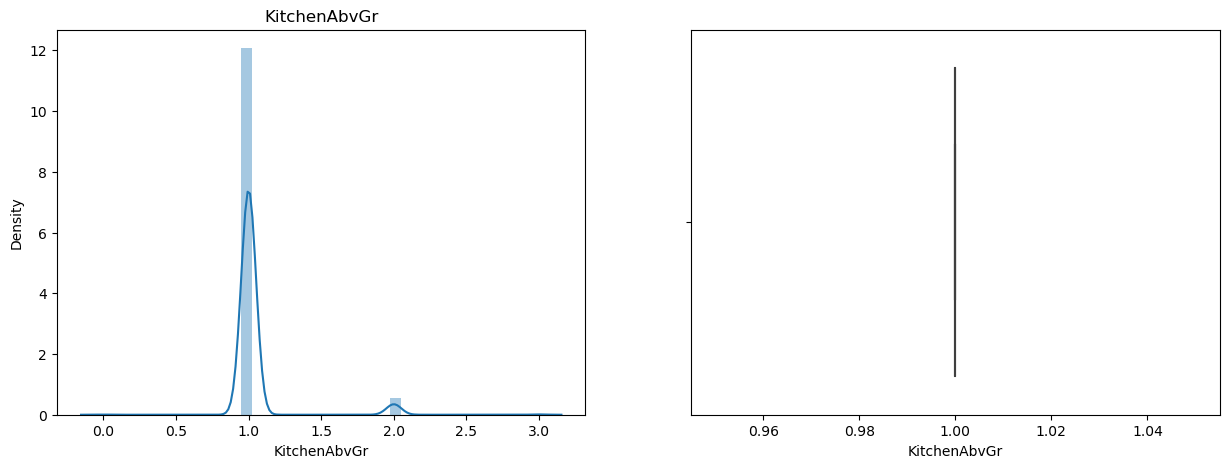

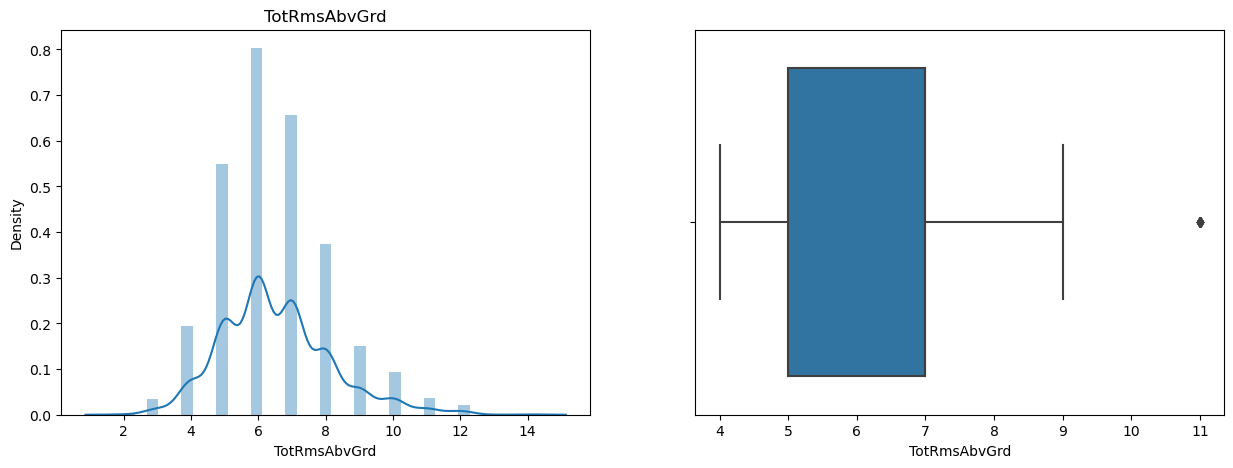

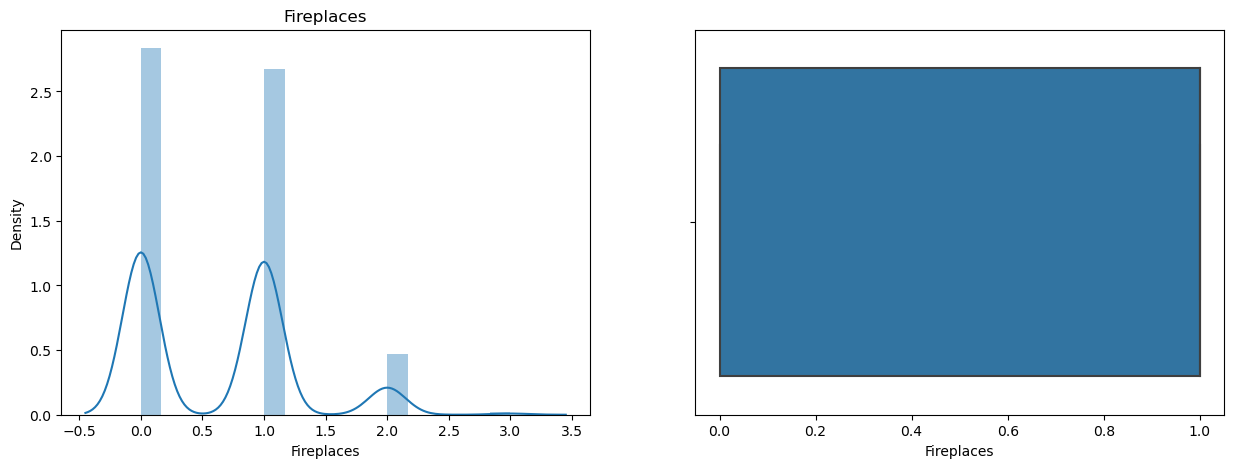

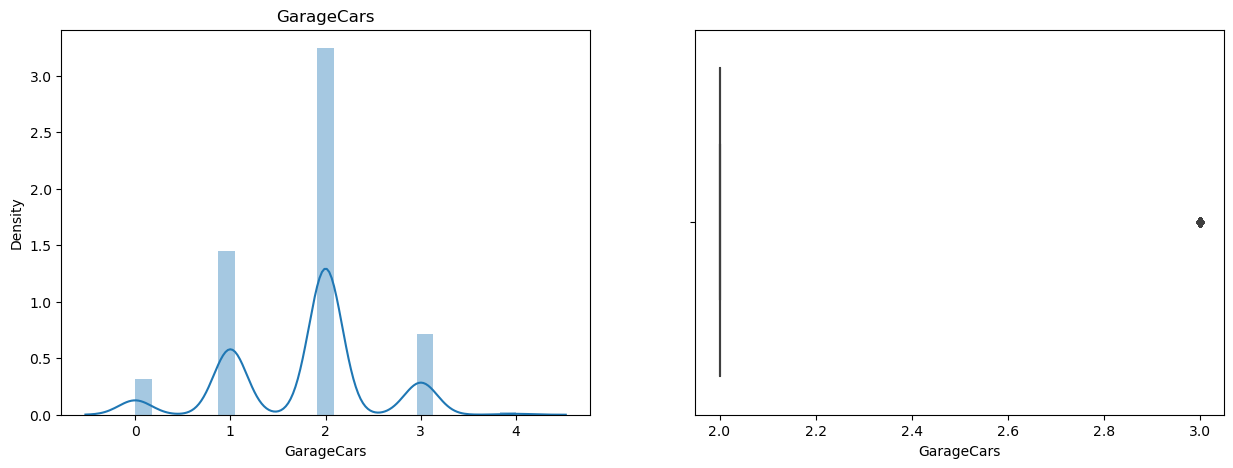

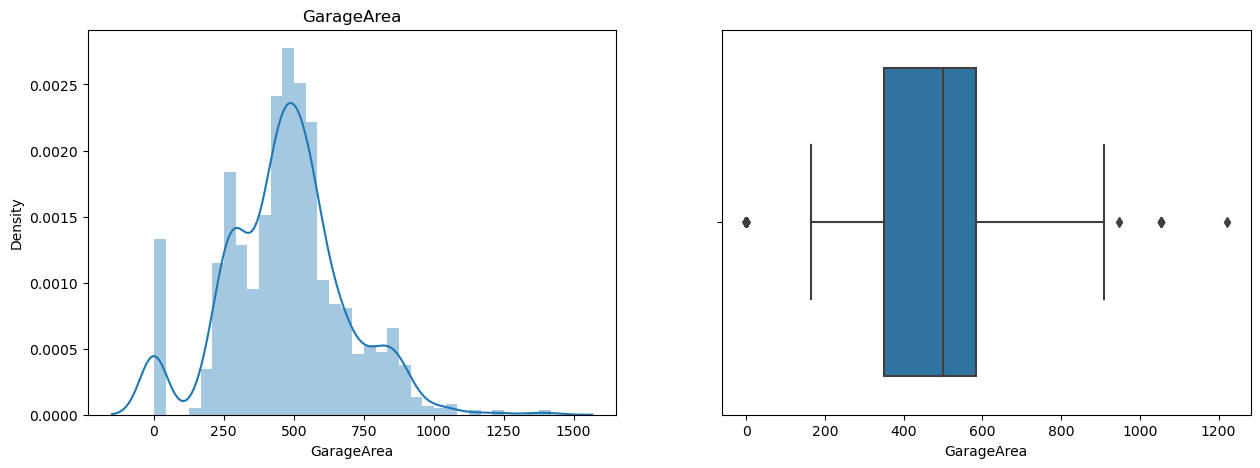

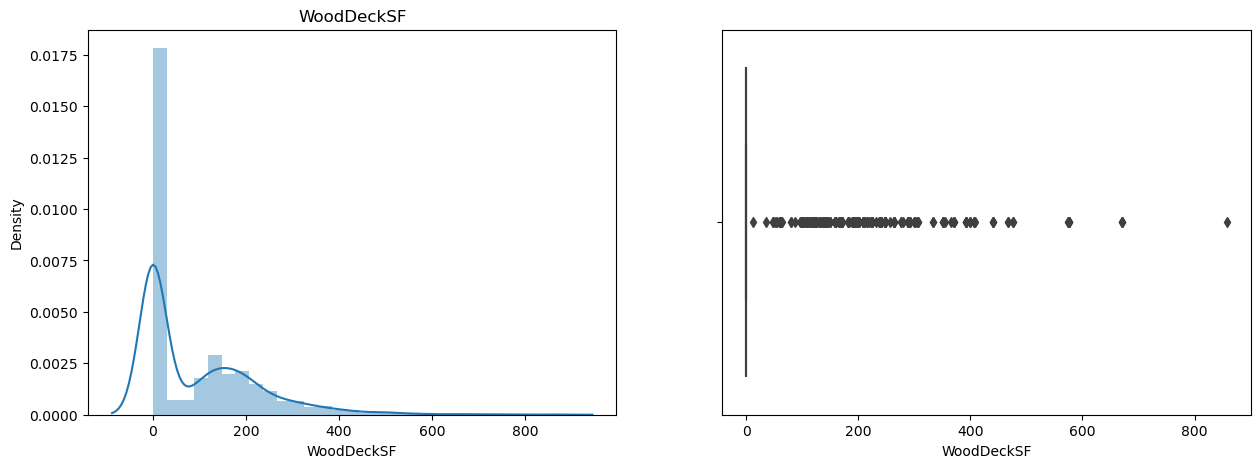

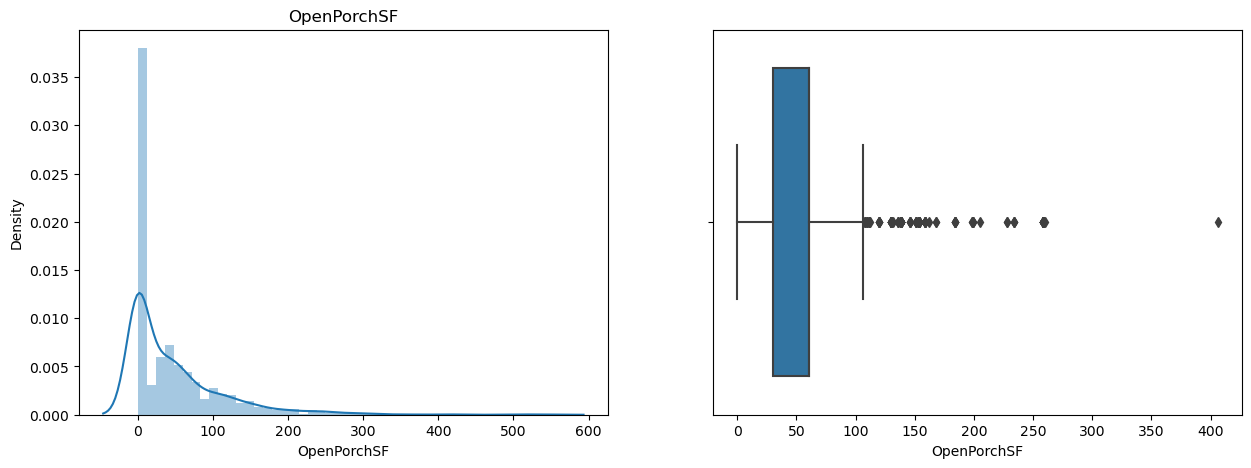

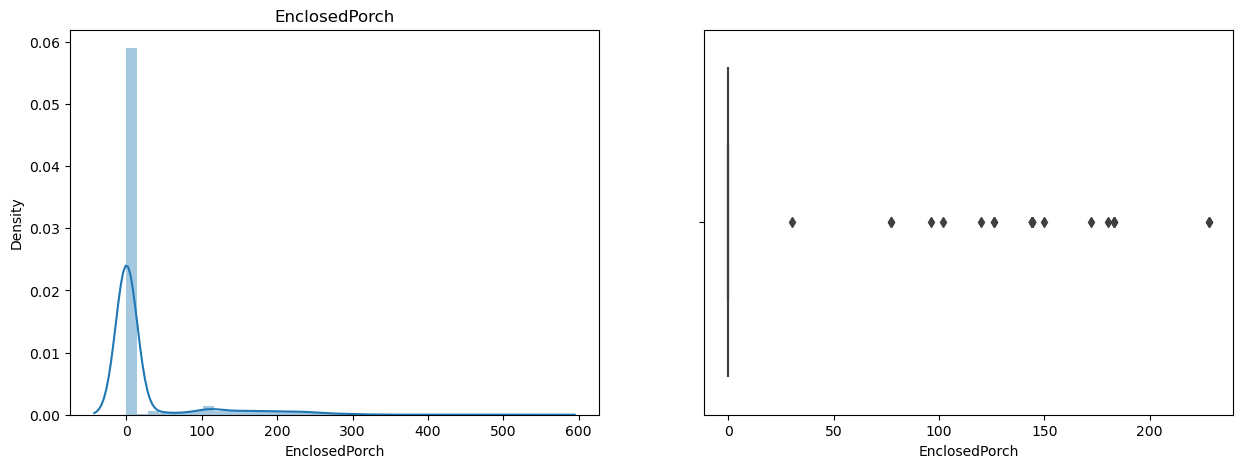

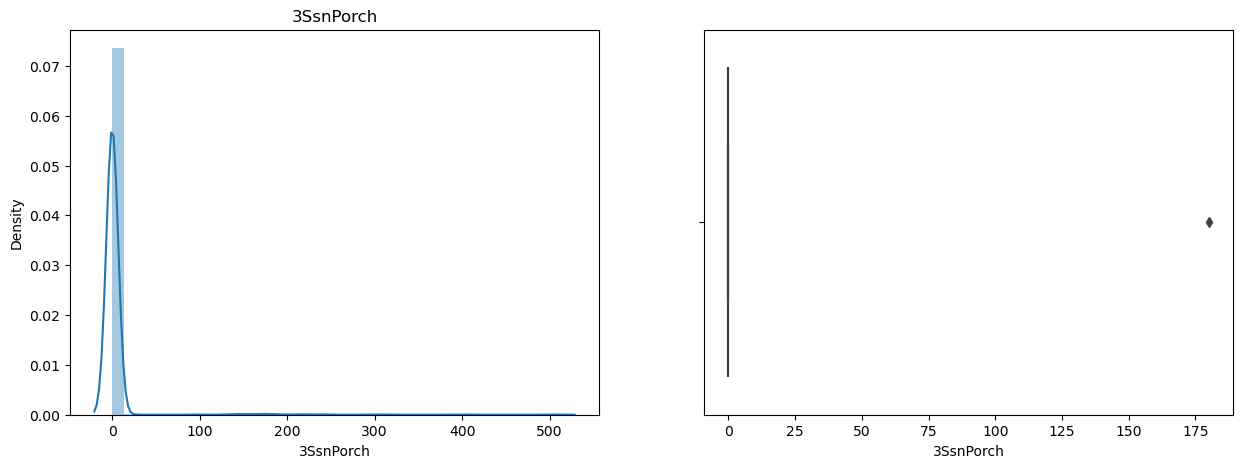

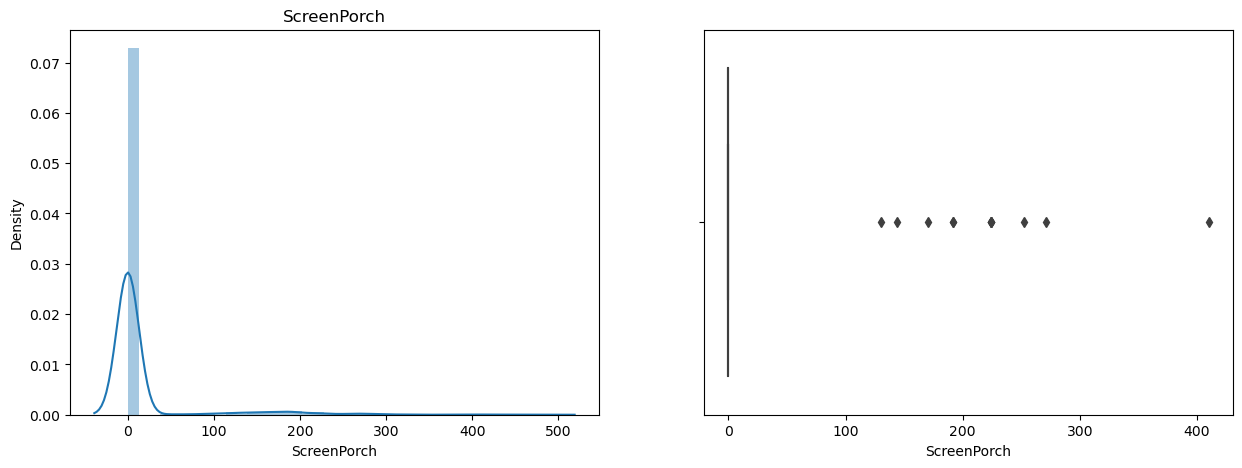

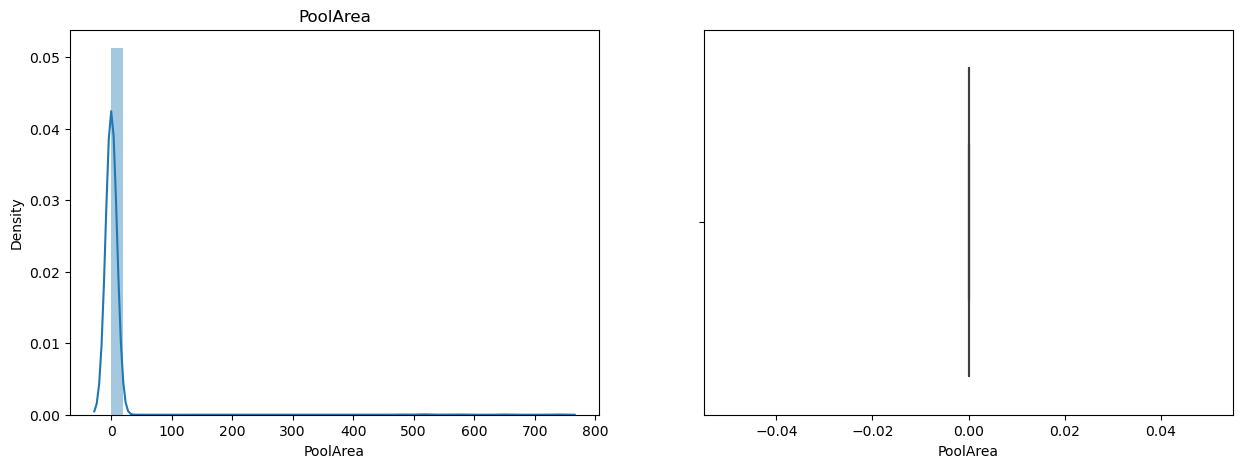

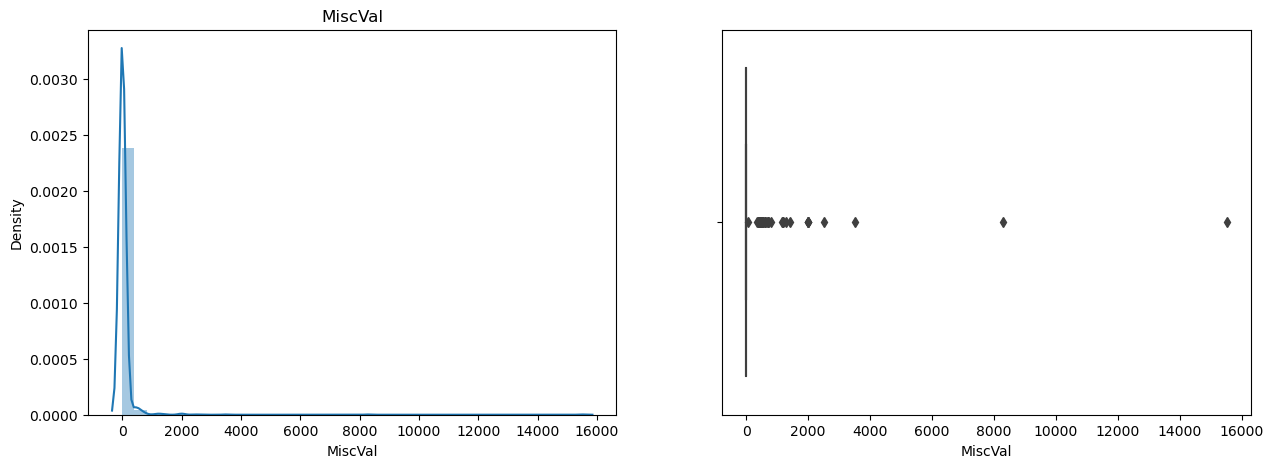

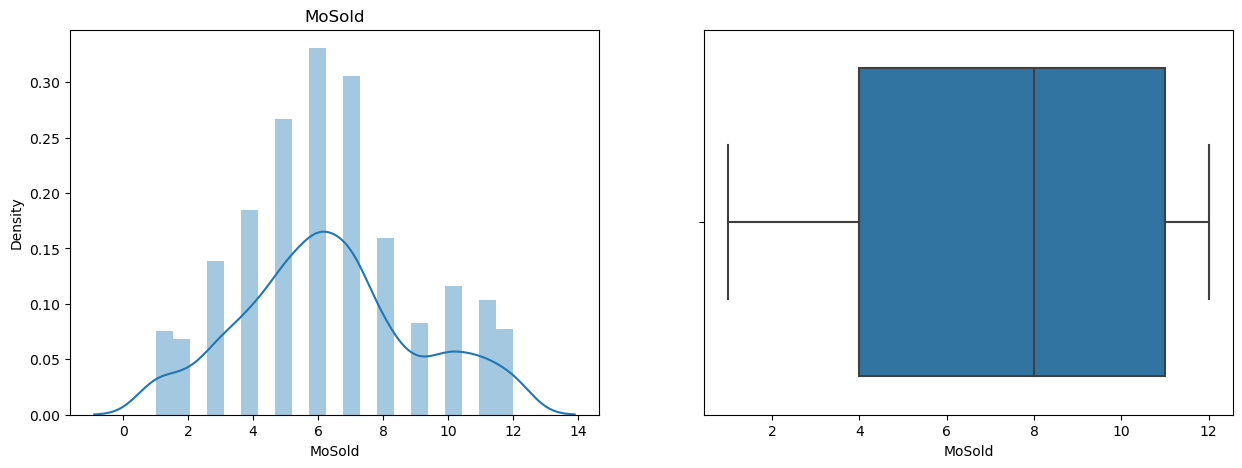

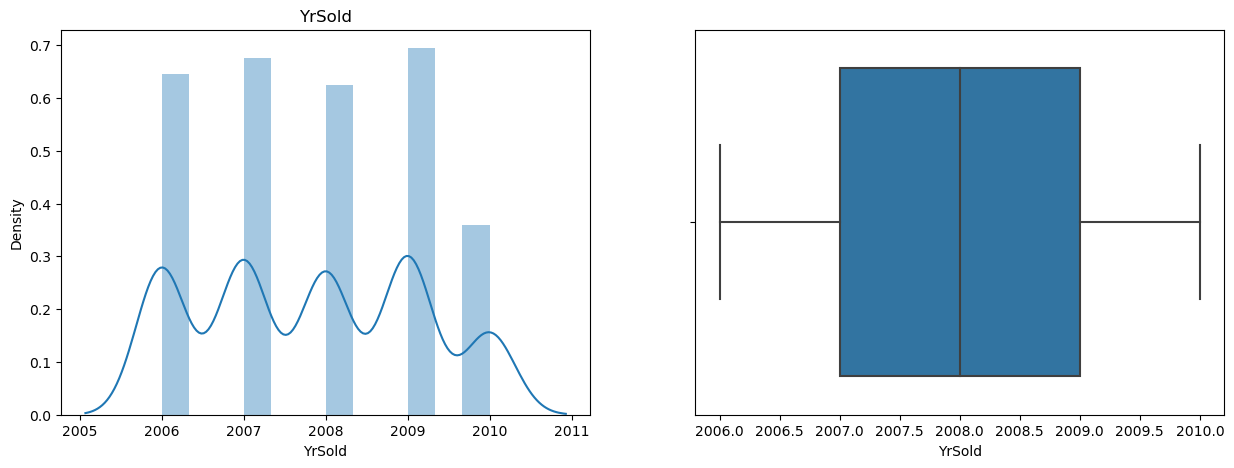

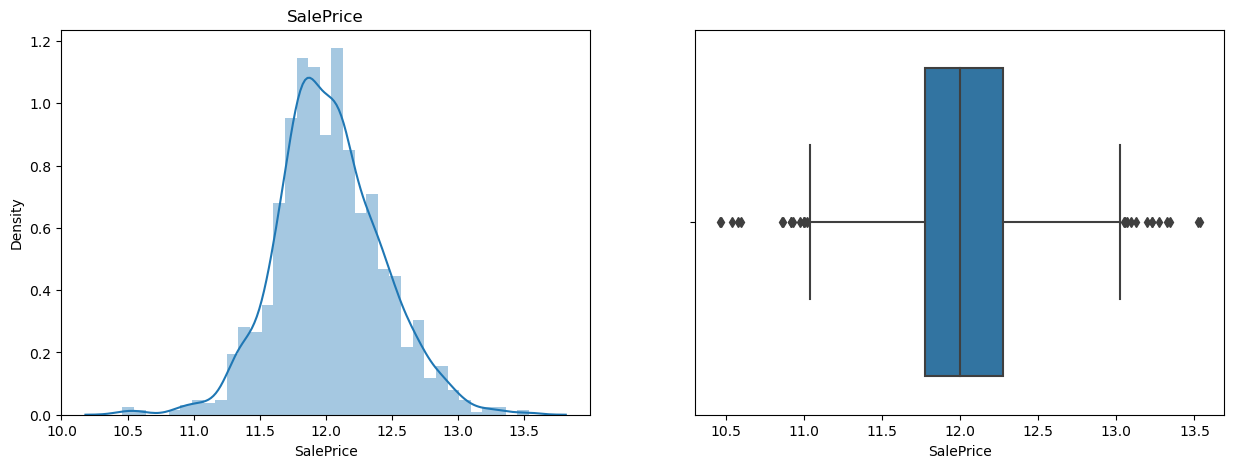

In [24]:
# Check the distriubtion of all numerical columns or variables using histograms and boxplots

# As we have large no of columsn we are going to use for loop for ploting the graphs

for col in df_numerical.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 12})
    sns.distplot(df_numerical[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_numerical[col], x=df_numerical[col])
    plt.show()

##### We can see many columns are having non-normal distribution and outliers. Hence we need to take care the outliers 

#### EDA (Data Visualization & Analysis) of all categorical columns

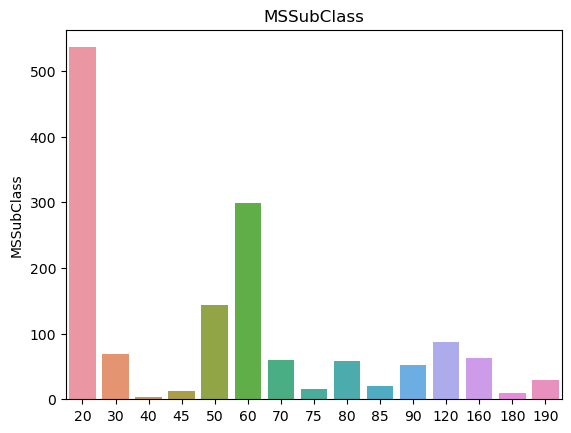

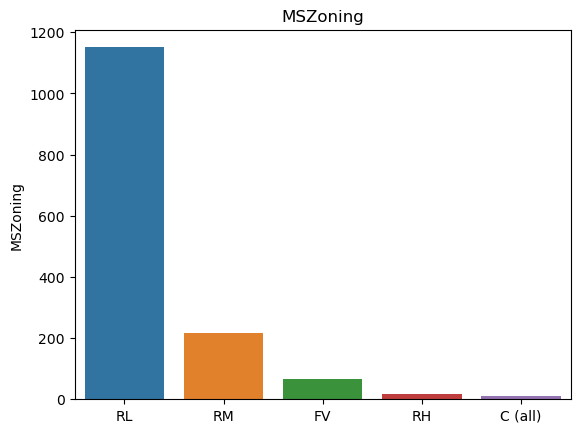

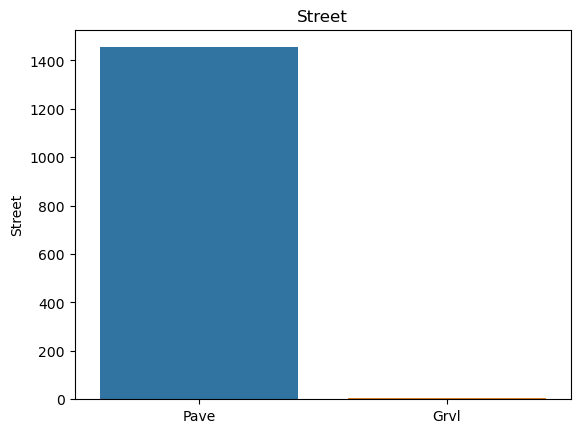

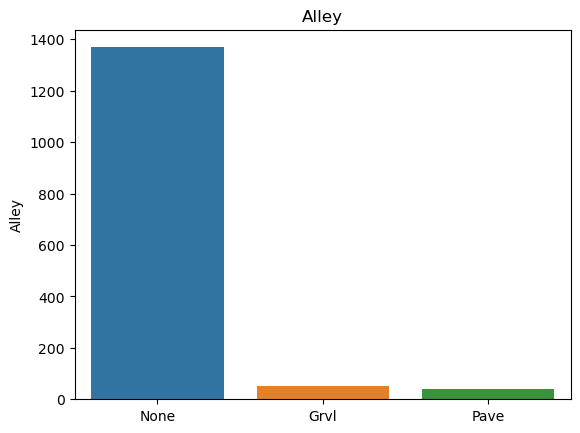

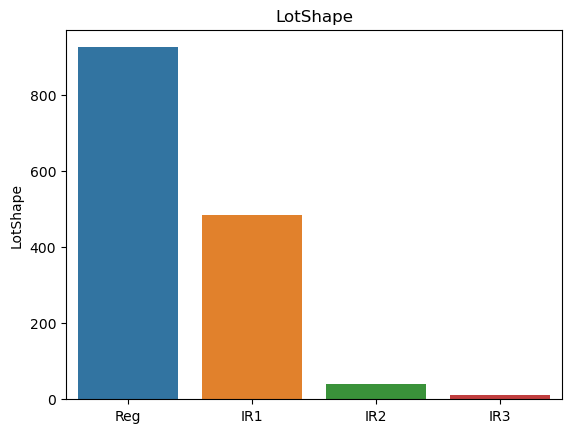

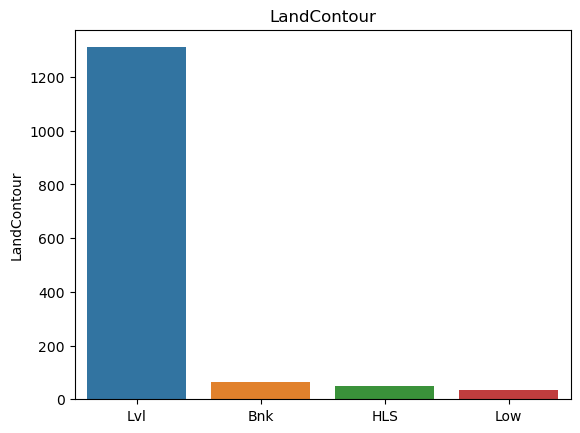

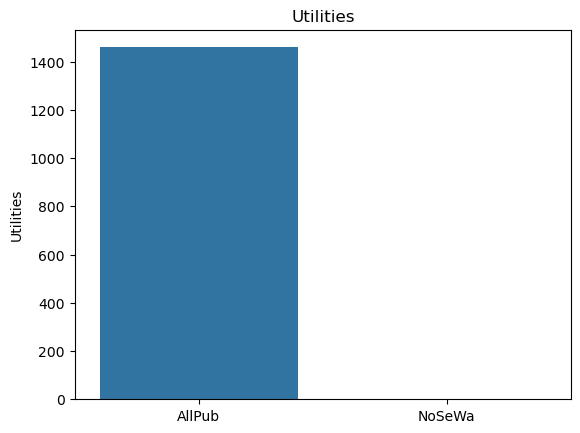

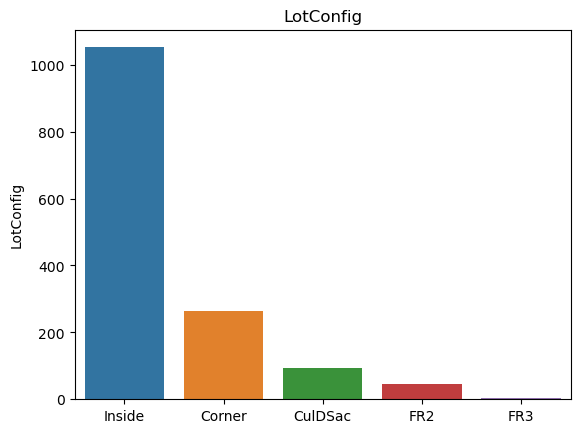

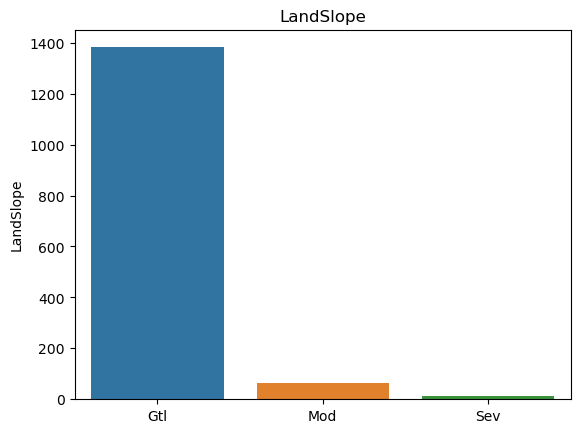

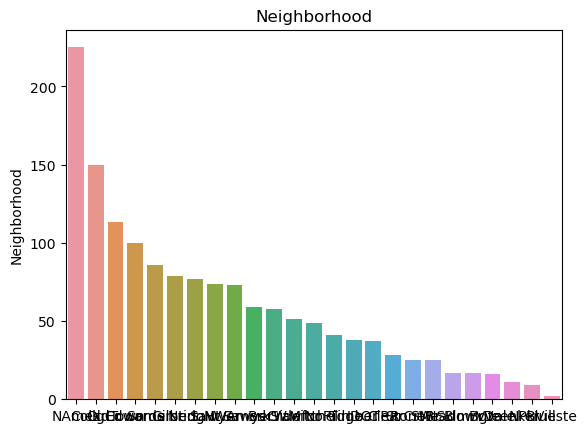

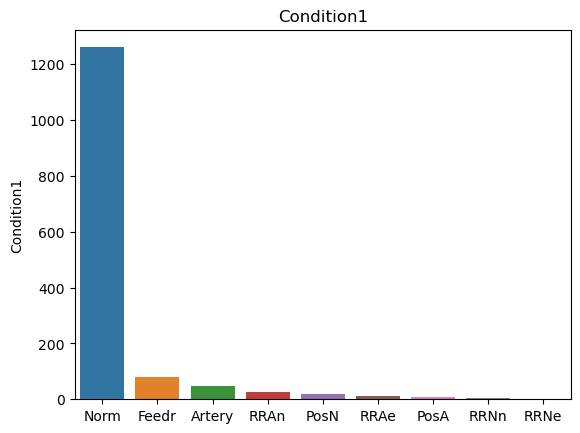

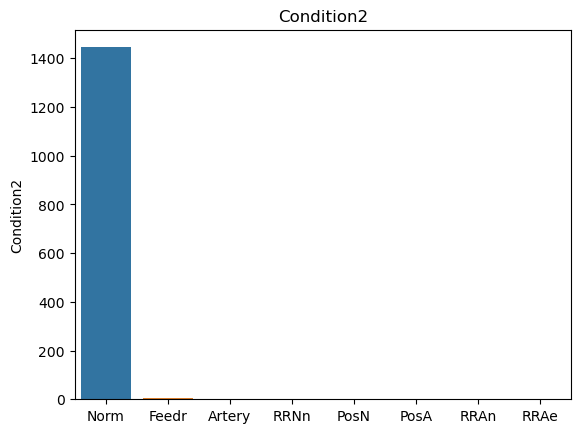

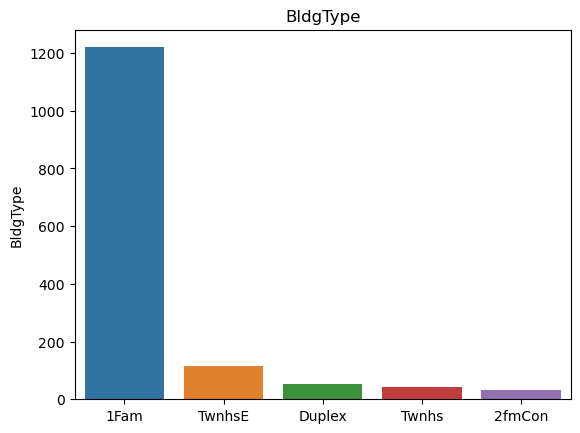

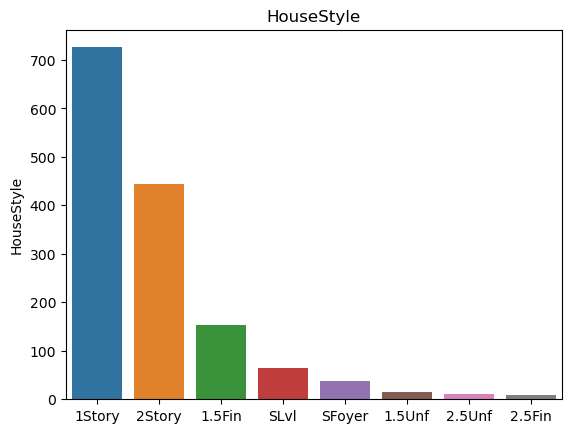

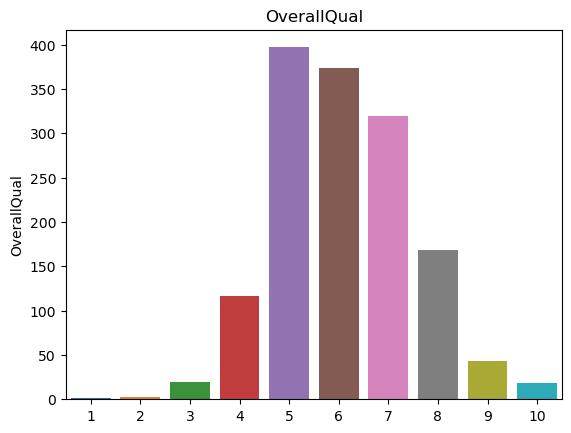

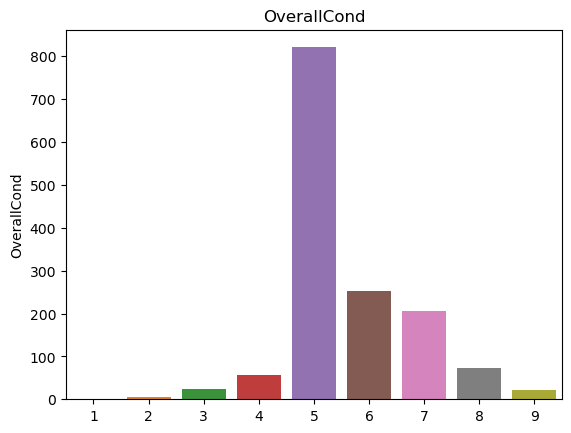

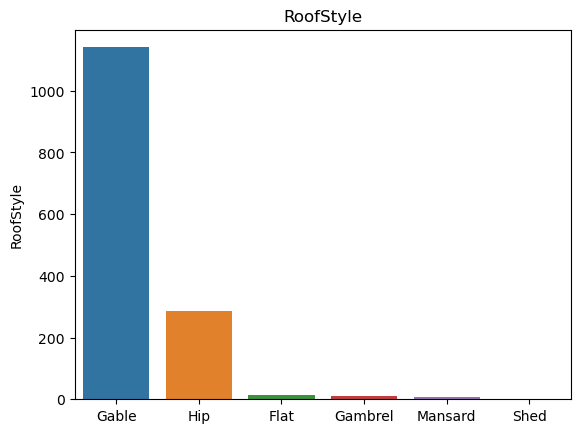

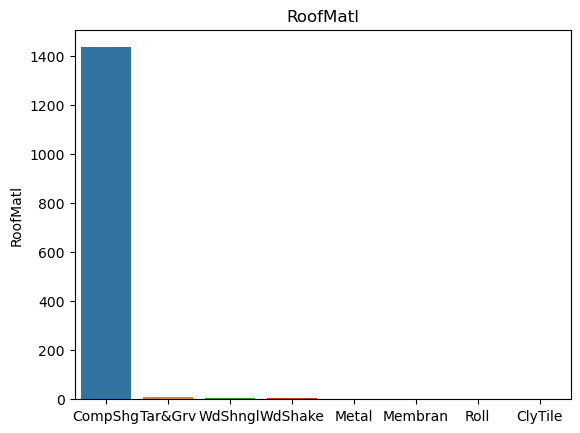

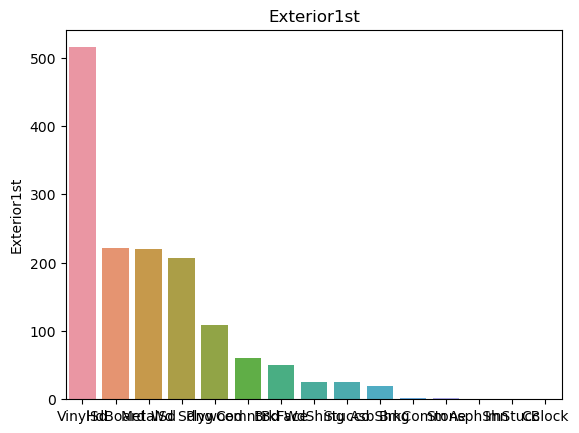

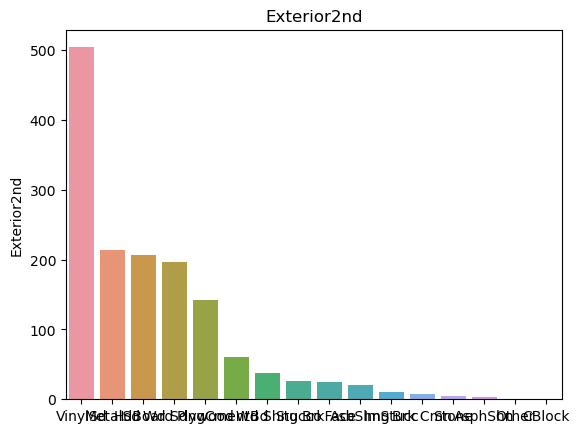

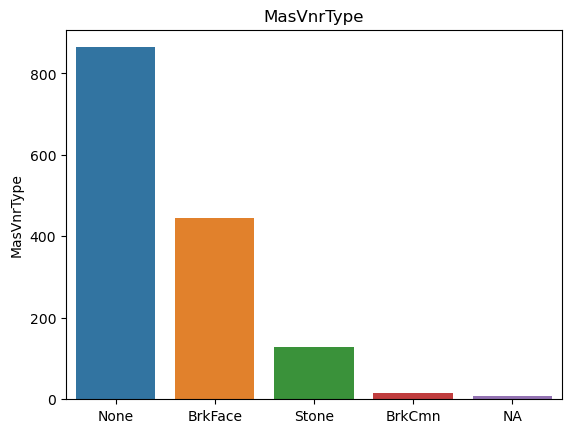

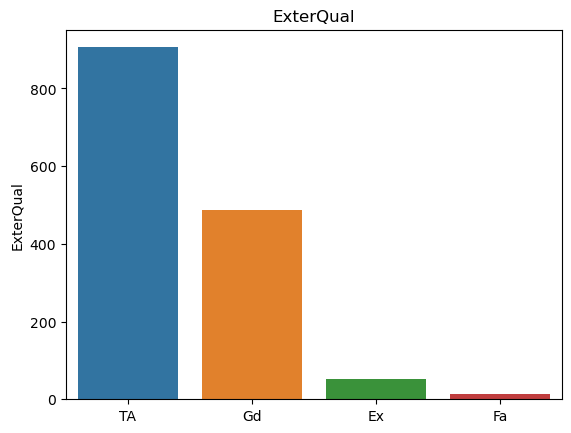

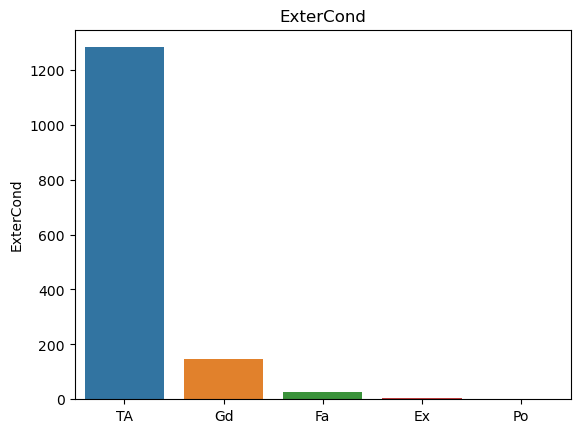

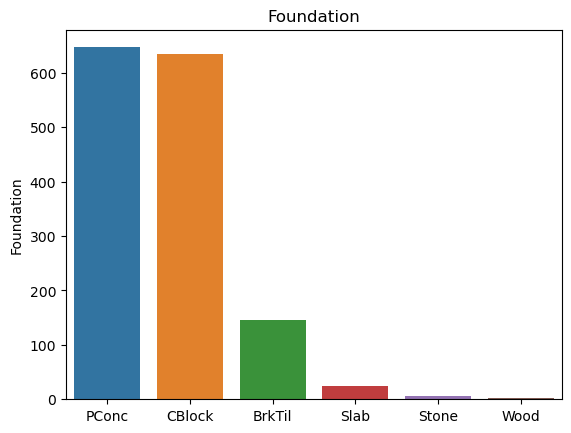

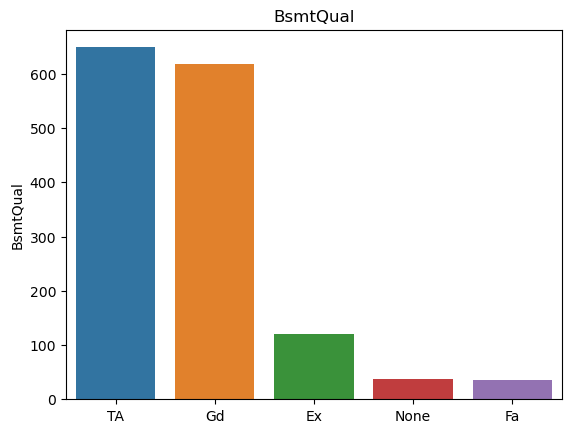

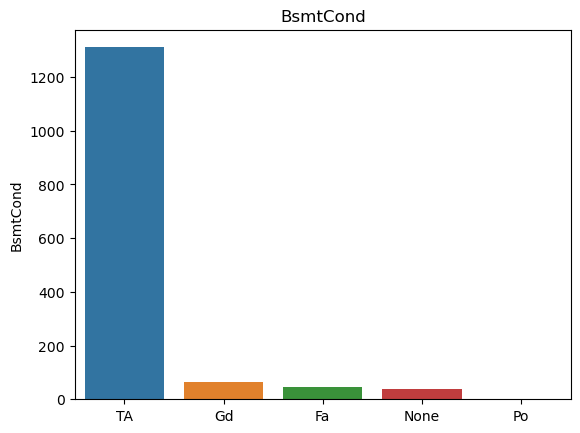

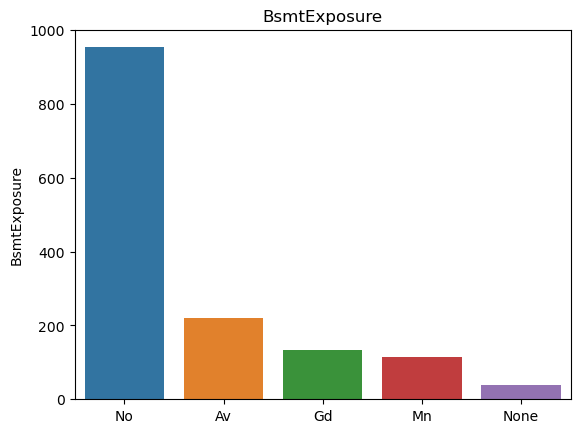

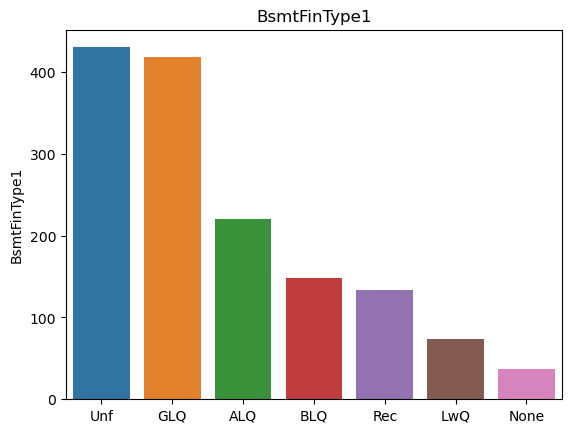

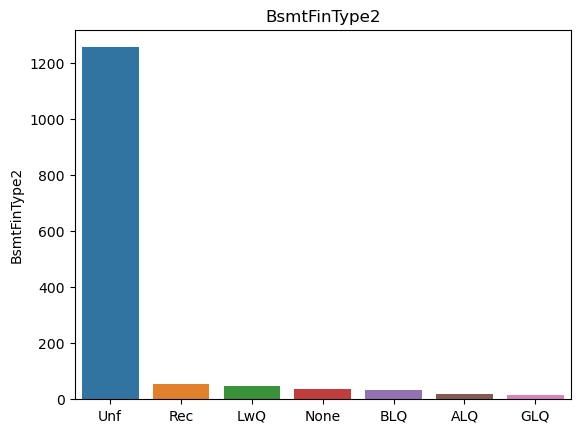

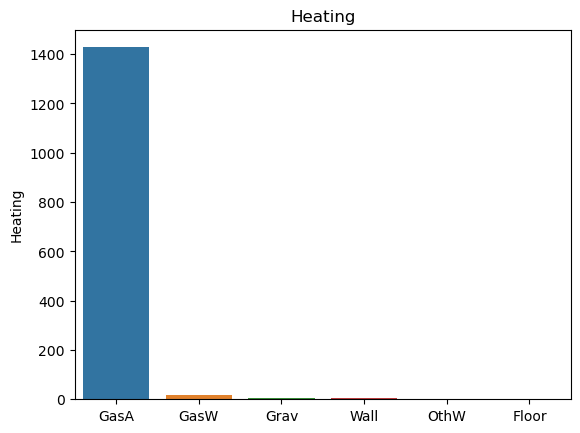

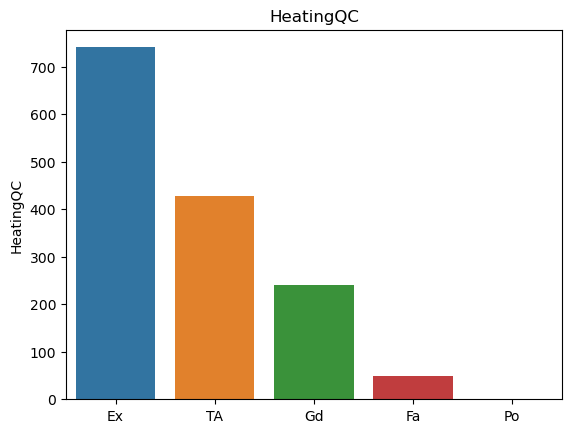

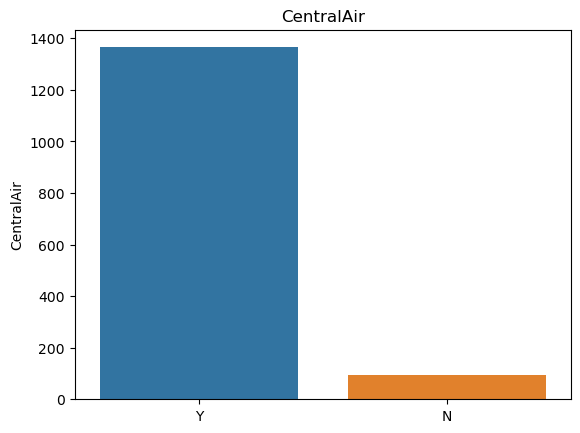

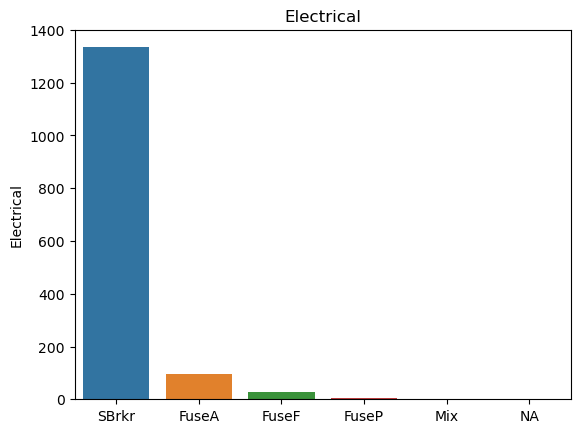

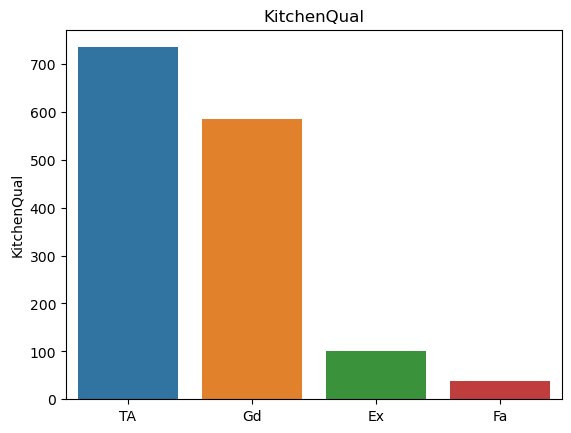

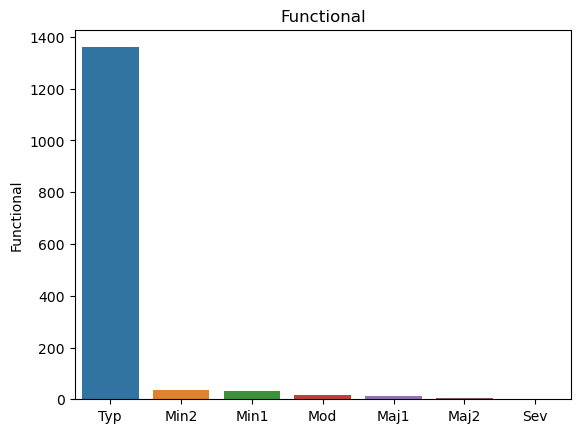

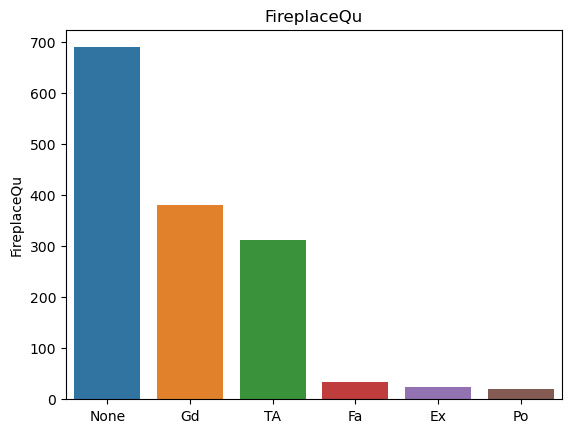

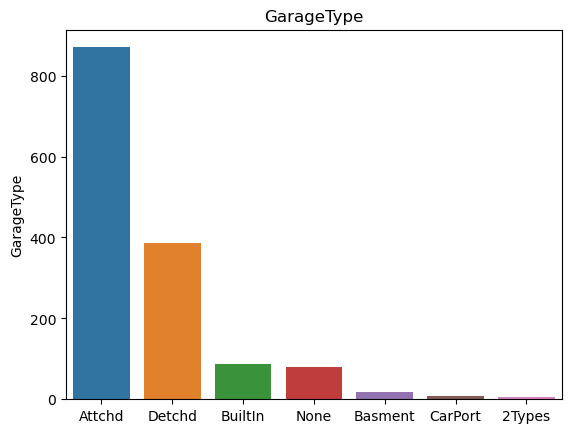

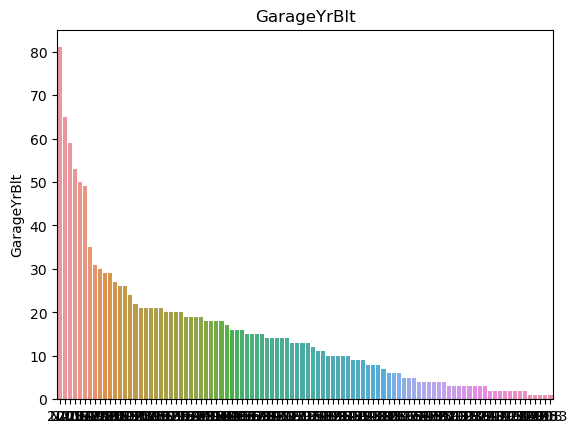

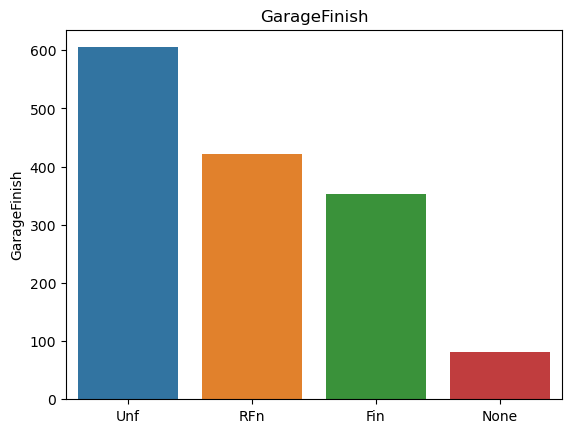

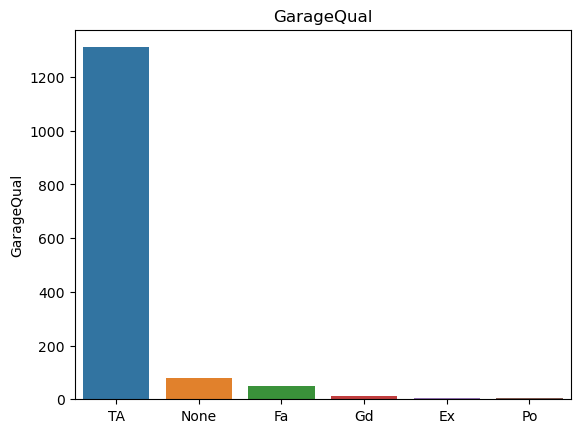

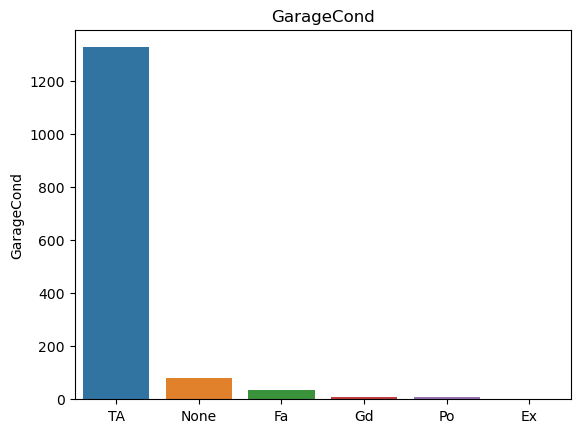

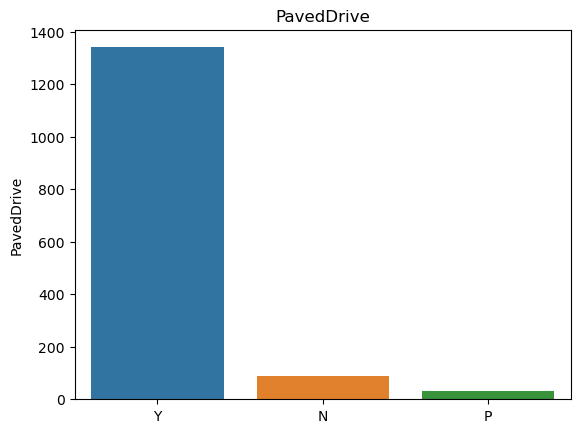

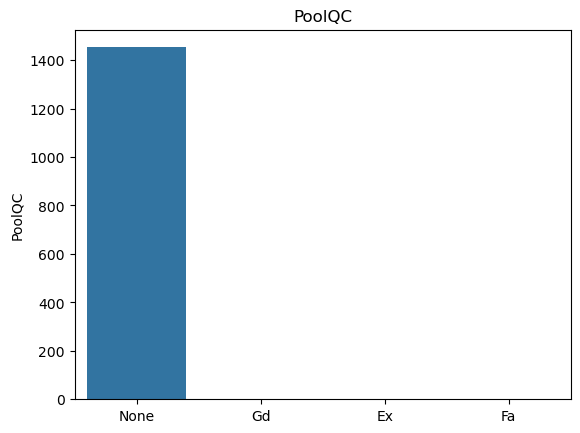

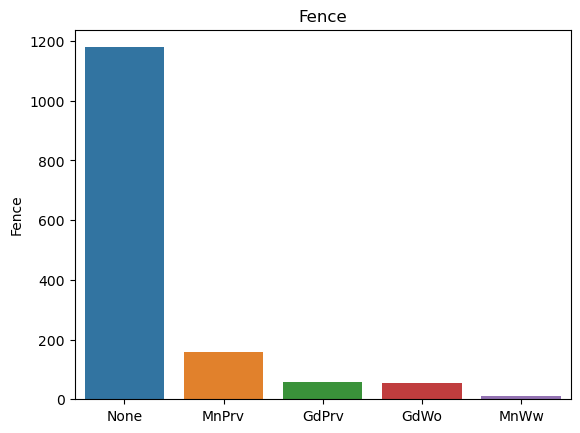

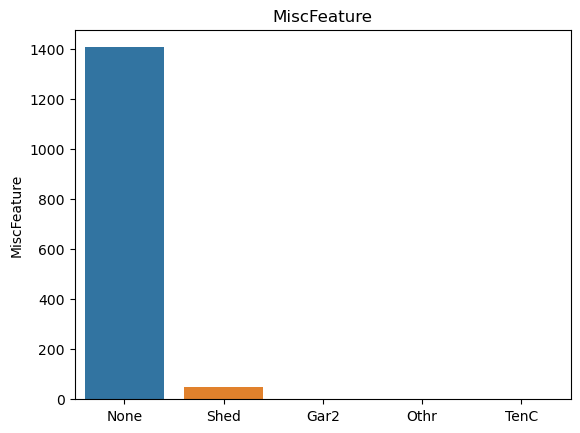

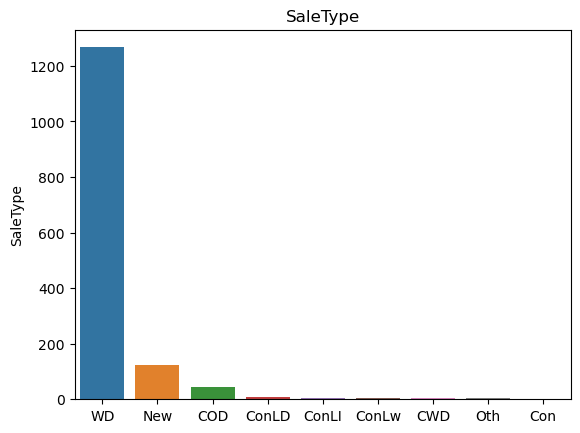

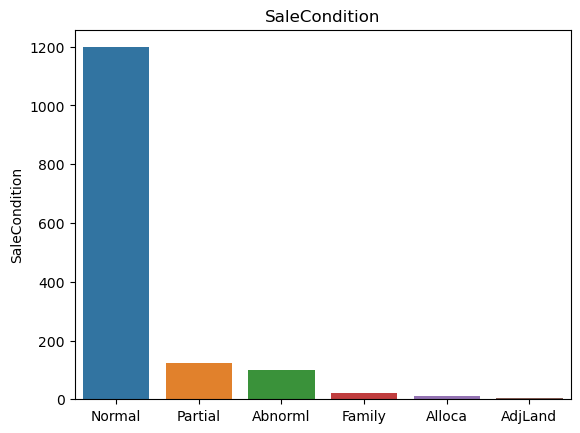

In [25]:
# Check all categorical columns or variables using barplots

# using for loop because of no of categorical columns

for col in df_categorical.columns:
    plt.figure()
    plt.title(col)
    sns.barplot(x=df_categorical[col].value_counts().index, y=df_categorical[col].value_counts())
    plt.show()

#### From looking closely at the counts of different values and the bar charts representing the data, we found that none of the columns have just one type of information throughout that we could take out/ remove or ignore from the dataset. 

- #### Step 3.2 - Bivariate Analysis

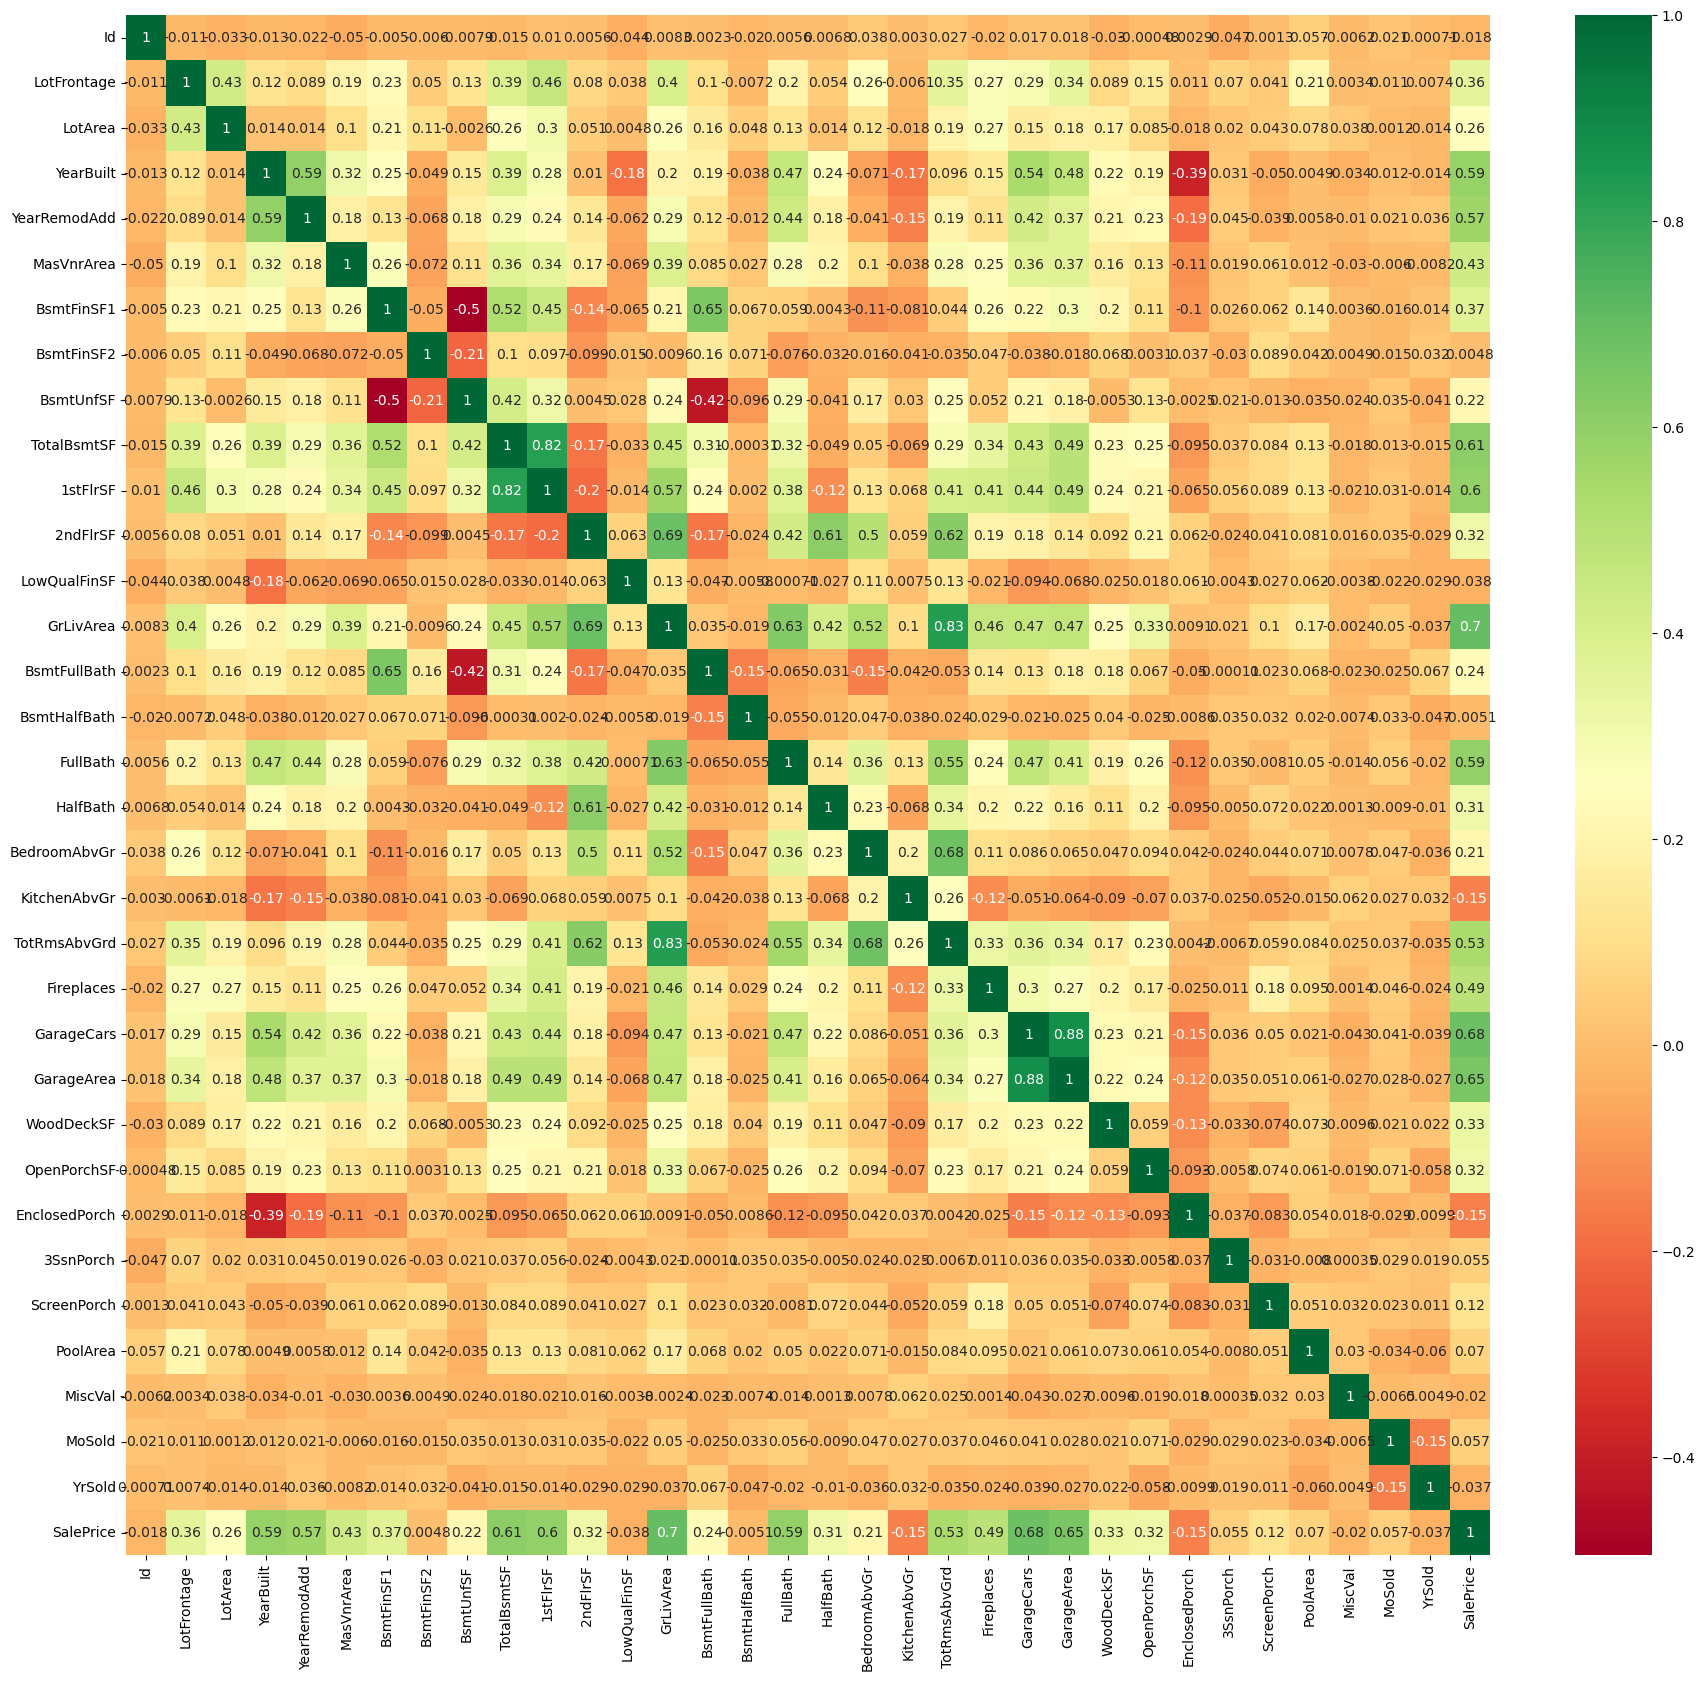

In [26]:
# lets check the correlations among numerical variables using heatmap using corr() method and seaborn library heatmap() method 
plt.figure(figsize=(22,20))
sns.heatmap(df_numerical.corr(), annot=True, cmap='RdYlGn');

#### Several columns show strong relationships with each other in the dataset. Specifically, the 'SalePrice' is noticeably linked with 'GrLivArea,' 'GarageCars,' and 'GarageArea.' Due to these strong connections between predictor variables, known as multicollinearity, it's advisable to consider using Ridge Regression for our analysis. Ridge Regression can help address the multicollinearity issue when there are predictors highly correlated with each other.

## Step 4 - Feature engineering(where we will add new columns from the existing one or may drop the columns which are not usefull)

In [27]:
# we need to create new column "PropertyAge" from columns "YrSold" and "YearBuilt"

df['PropertyAge'] = df['YrSold']-df['YearBuilt']

In [28]:
# now we have new colum "PropertyAge" hence we can remove the two columns "YrSold" and "YearBuilt" 

df.drop(['YrSold', 'YearBuilt'], axis=1, inplace = True)


In [29]:
# Check the dataset once again and make sure the new changes are reflecting properly or not

df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL         65.0     8450   Pave  None      Reg   
1   2         20       RL         80.0     9600   Pave  None      Reg   
2   3         60       RL         68.0    11250   Pave  None      IR1   
3   4         70       RL         60.0     9550   Pave  None      IR1   
4   5         60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle OverallQual OverallCond  YearRemodAdd  \
0       Norm     1Fam     2Story           7           5          2003   
1       Norm     1Fam     1Story           6           8          1976   
2       Norm     1Fam     2Story           7           5          2002   
3       Norm     1Fam     2Story           7           5          1970   
4       Norm     1Fam     2Story           8           5          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         706          Unf           0        150          856    GasA   
1         978          Unf           0        284         1262    GasA   
2         486          Unf           0        434          920    GasA   
3         216          Unf           0        540          756    GasA   
4         655          Unf           0        490         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           1          Gd   
4             1          Gd             9  

## Step 5 - Data preparation(data preprocessing) and cleaning 

In [30]:
# again we need to check the missing values in dataset for all features using isna() method

df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

#### Again we can see the same numerical columns which are "LotFrontage" and "MasVnrArea" have the missing values so we need to handle those by replacing the missing values by respective column mean value 

In [31]:
# Now we are replacing missing values in  "LotFrontage" and "MasVnrArea" by column means

# For "LotFrontage"
df["LotFrontage"].fillna(df["LotFrontage"].mean(), inplace=True)

# For "MasVnrArea"
df["MasVnrArea"].fillna(df["MasVnrArea"].mean(), inplace=True)


In [32]:
# Again check for missing values 

df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

#### Now there are no missing values now we can move ahead with next part which is Creation of Dummy Variable

In [33]:
# We need to grab the categorical and numerical variables or columns or features once again from the updated dataset
# because we have done some data manipulation which are added new column and removed the existing columns from the dataset 

df_categorical = df.select_dtypes(include="object")

df_numerical = df.select_dtypes(include=["int64", "float64"])


In [34]:
# Create dummy variables from categorical values 
df_categorical_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_categorical_dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0           1           0             0             0             1   
1           1           0             0             0             1   
2           1           0             0             0             0   
3           1           0             0             0             0   
4           1           0             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   N

In [35]:
# now we need to check the shape of newly created dataset

df_categorical_dummies.shape

(1460, 353)

<Axes: >

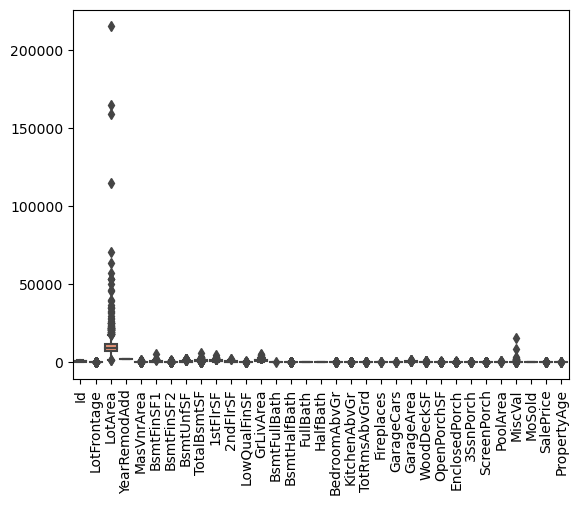

In [36]:
### Now we need take care the outliers of numerical variables

plt.figure()
plt.xticks(rotation=90)
sns.boxplot(data= df_numerical)

In [37]:
# we need to cap the outliers to 5% at lower bound and 95% at upper bound 

# we have two ways to remove outliers 

# First way-

# #IQR(Interquartile range) to remove outliers
# Q1 = df[df_numerical.columns].quantile(0.05)
# Q2 = df[df_numerical.columns].quantile(0.95)
# IQR = Q3 - Q1
# df = df[~((df[df_numerical.columns] < (Q1 - 1.5 * IQR)) |(df[df_numerical.columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Second way where we are using for loop which we have finalised-

for col in df_numerical.columns:
    df_numerical[col][df_numerical[col] <= df_numerical[col].quantile(0.05)] = df_numerical[col].quantile(0.05)
    df_numerical[col][df_numerical[col] >= df_numerical[col].quantile(0.95)] = df_numerical[col].quantile(0.95)
    
    

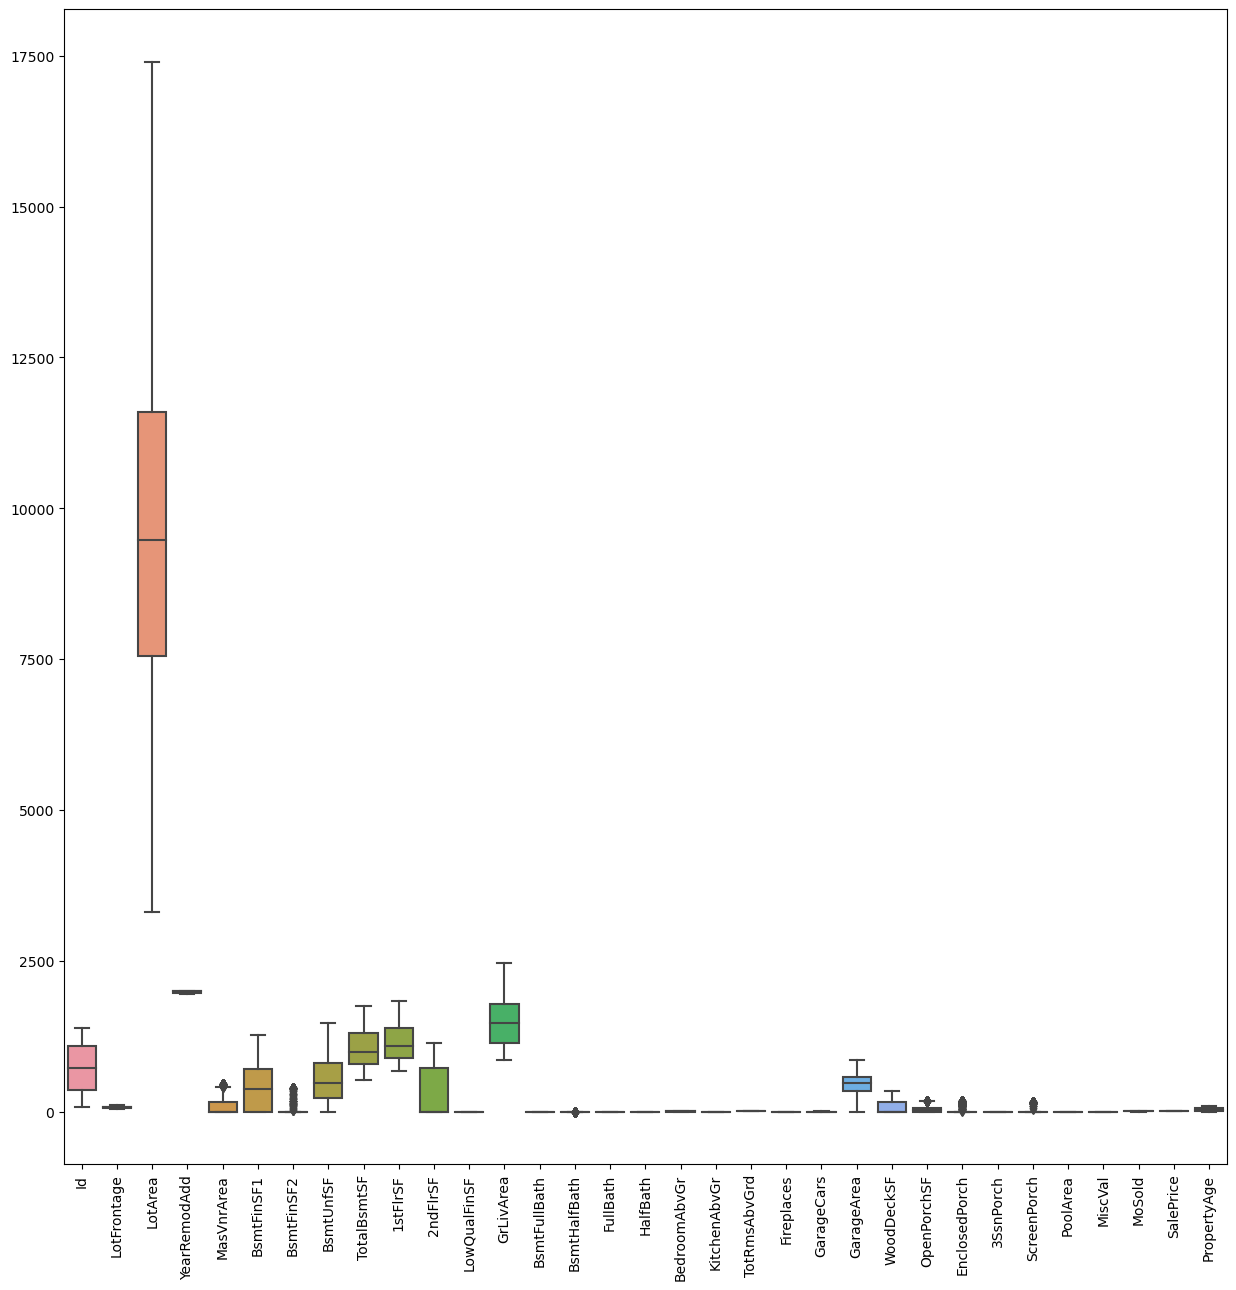

In [38]:
# Now we need to check are outliers treated or taken care properly or not? 

# We are going to check using boxplots 

plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_numerical);

#### Seems we removed the outliers successfully from all numerical columns 

In [39]:
# Now we need to add two datasets which are the numerical and categorical(with dummy variables) datasets

df = pd.concat([df_numerical, df_categorical_dummies], axis = 1)

# check the top 5 records to validate the changes

df.head()

Id  LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0  73.95         65.0   8450.0          2003       196.0         706   
1  73.95         80.0   9600.0          1976         0.0         978   
2  73.95         68.0  11250.0          2002       162.0         486   
3  73.95         60.0   9550.0          1970         0.0         216   
4  73.95         84.0  14260.0          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         0.0        150        856.0     856.0     854.0             0   
1         0.0        284       1262.0    1262.0       0.0             0   
2         0.0        434        920.0     920.0     866.0             0   
3         0.0        540        756.0     961.0     756.0             0   
4         0.0        490       1145.0    1145.0    1053.0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0     1710.0             1             0         2         1             3   
1     1262.0             0             1         2         0             3   
2     1786.0             1             0         2         1             3   
3     1717.0             1             0         1         0             3   
4     2198.0             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2       548.0           0   
1             1             6           1           2       460.0         298   
2             1             6           1           2       608.0           0   
3             1             7           1           3       642.0           0   
4             1             9           1           3       836.0         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0         61.0           0.00          0            0         0        0   
1          0.0           0.00          0            0         0        0   
2         42.0           0.00          0            0         0        0   
3         35.0         180.15          0            0         0        0   
4         84.0           0.00          0            0         0        0   

   MoSold  SalePrice  PropertyAge  MSSubClass_30  MSSubClass_40  \
0       2  12.247694            5              0              0   
1       5  12.109011           31              0              0   
2       9  12.317167            7              0              0   
3       2  11.849398           91              0              0   
4      11  12.429216            8              0              0   

   MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0              0              0              1              0              0   
1              0              0              0              0              0   
2              0              0              1              0              0   
3              0              0              0              1              0   
4              0              0              1              0              0   

   MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0               0   
1              0              0              0               0   
2              0              0              0               0   
3              0              0              0               0   
4              0              0              0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  \
0               0               0               0            0            0   
1               0               0               0            0            0   
2               0               0               0            0            0   
3               0               0               0            0            0   
4               0               0

#### Now we are ready for further processing which is model building

## Step 6 - Model building

#### Splitting the data into train and test datasets

In [40]:
## We need to remove Id column as its not required for our model
df = df.drop(['Id'], axis=1)

In [41]:
## we need to split the target variable as Y which we are going to predict 
y =  df.pop('SalePrice')

# check the y data

y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [42]:
X = df

# check the shape of dataset
X.shape

(1460, 384)

In [43]:
# Splitting X and y into 80% train and 20% test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [44]:
# lets check the shape of train and test data

# train dataset
print("Train dataset shape-")
print(X_train.shape)
print(y_train.shape)

# test dataset
print("Test dataset shape-")
print(X_test.shape)
print(y_test.shape)


Train dataset shape-
(1168, 384)
(1168,)
Test dataset shape-
(292, 384)
(292,)


#### Scaling numerical variables or columns or features

In [45]:
# Now we need to create list of numerical columns which we are going to scaled

numerical_columns = list(X_train.select_dtypes(include=["int64","float64"]).columns)

# check the extracted numerical columns
print(numerical_columns)

['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'PropertyAge']


In [46]:
# Now we are going to scale our numerical columns using scikit-learn library's StandardScalar or MinMaxScaler class methods 

# Which one should we use StandardScalar or MinMaxScaler?
# StandardScaler:
# 1. Used when your data looks like a bell-shaped curve.
# 2. Helps when you want to compare things that are measured in different ways.
# 3. Handy for certain math methods that expect data to be bell-shaped.


# MinMaxScaler:
# 1. Used when your data doesn't follow a bell-shaped curve.
# 2. Keeps the connections between things in your data intact.
# 3. Good for math that cares about how big or small your data is, but doesn't need it to be a certain shape.

# So we are using StandardScaler which make sense in our case-

scalerObj = StandardScaler()

X_train[numerical_columns] = scalerObj.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scalerObj.transform(X_test[numerical_columns])


#### 1 -  Ridge Regression

> Ridge Regression is a type of linear regression that's used when the dataset has multicollinearity, meaning the predictor variables are highly correlated. In a regular linear regression, when this multicollinearity occurs, it can lead to overfitting or very sensitive estimates of the coefficients.

> Ridge Regression addresses this issue by adding a penalty term (also known as a regularization term) to the linear regression equation. This penalty term is based on the square of the magnitudes of the coefficients. By adding this term, Ridge Regression imposes a penalty on the size of coefficients, preventing them from becoming too large.

> The main goal of Ridge Regression is to find a balance between fitting the model well to the data and keeping the model's coefficients from becoming overly sensitive to the dataset. It does this by introducing a tuning parameter (often denoted as lambda or alpha) that controls the strength of the penalty applied to the coefficients.

> In simpler terms, Ridge Regression is a technique used in statistics and machine learning to handle situations where predictor variables are highly correlated. It prevents overfitting by adjusting the coefficients in a way that finds a good balance between fitting the data and preventing extreme coefficient values.

In [47]:
# We are going to create Ridge Regression Model

# Defining a list of alpha values to perform cross-validation for Ridge Regression
alpha_values = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]

# Initializing Ridge Regression model
ridge_model = Ridge()

# Setting up the GridSearchCV for cross-validation to find the best alpha value
param_grid = {'alpha': alpha_values}  # Dictionary containing alpha values to be tested
scoring_method = 'neg_mean_absolute_error'  # Scoring method used for evaluation
cross_validation = 5  # Number of cross-validation folds
ridge_cv = GridSearchCV(estimator=ridge_model,
                        param_grid=param_grid,
                        scoring=scoring_method,
                        cv=cross_validation,
                        return_train_score=True,
                        verbose=1,  # Verbosity level: 1 for showing progress
                        n_jobs=-1)  # All available CPU cores are used for computation

# Fitting the Ridge Regression model using GridSearchCV on the training data
ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [48]:
# Lets check the optimal value of alpha
print("Optimal Value of alpha-",ridge_cv.best_params_)

Optimal Value of alpha- {'alpha': 10.0}


In [49]:
# display the results of cross validation
ridge_cv.cv_results_

{'mean_fit_time': array([0.05211968, 0.04770932, 0.03645058, 0.03571844, 0.03230138,
        0.0348155 , 0.03281393, 0.03510408, 0.03997169, 0.03330369,
        0.03572121, 0.03801389, 0.03220611, 0.0323153 , 0.03361239,
        0.03530583, 0.03799253, 0.03320947, 0.03290706, 0.03190799,
        0.03391809, 0.0342093 , 0.03270597, 0.03281007, 0.03441262,
        0.03600187, 0.03672013, 0.03259907]),
 'std_fit_time': array([0.0056298 , 0.00904895, 0.00551739, 0.00468069, 0.0021387 ,
        0.00393963, 0.00196534, 0.00627566, 0.01490288, 0.00339925,
        0.00478955, 0.00853258, 0.00160261, 0.00320161, 0.00132037,
        0.0029861 , 0.00634501, 0.0005058 , 0.00201016, 0.00215463,
        0.00496167, 0.00261038, 0.00159813, 0.00444159, 0.00212726,
        0.00429157, 0.00997606, 0.00162601]),
 'mean_score_time': array([0.01060557, 0.00980058, 0.01015105, 0.00930181, 0.00980177,
        0.00990744, 0.00940037, 0.0096004 , 0.00940018, 0.01039987,
        0.01000333, 0.01110764, 0.009207

##### Therefore, after performing cross-validation, the optimal value for the alpha parameter is determined to be 10. Now, we'll proceed to construct a Ridge Regression model utilizing this identified alpha value.

In [50]:
# Now creating ridge regression object with optimal value alpha = 10

ridge = Ridge(alpha=10)

In [51]:
# Lets apply or fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [53]:
# lets check the coefficients of fitted ridge model 
ridge.coef_

array([ 6.56023354e-03,  2.07307896e-02,  2.49825538e-02, -2.40354563e-03,
        1.00177182e-02, -3.15225697e-04, -1.49039561e-02,  5.20474484e-02,
        7.45664130e-03,  2.88435254e-02,  0.00000000e+00,  8.85807944e-02,
        8.24181724e-03, -4.24723298e-04,  1.17438229e-02,  1.25064397e-02,
        4.98554634e-03,  0.00000000e+00, -3.41180286e-04,  1.92127953e-02,
        1.68790936e-02,  1.67328322e-02,  1.23269319e-02,  7.87306236e-03,
        2.53822117e-03,  0.00000000e+00,  1.07139979e-02,  0.00000000e+00,
        0.00000000e+00, -7.78499263e-04, -5.04655943e-02, -4.07061234e-02,
        5.51648124e-03,  6.20801048e-04, -4.85860044e-03, -5.71150836e-03,
        3.91666483e-02,  3.10825761e-02,  7.08003745e-04,  4.75844066e-03,
       -3.48924107e-02,  5.93672173e-03, -5.14776147e-02, -1.19237188e-02,
       -1.79847431e-02,  3.50102825e-02,  1.44037721e-02,  1.11946464e-02,
       -2.40515945e-02, -5.34877888e-03, -5.46542710e-03,  1.64560909e-02,
        1.08365421e-02, -

In [54]:
# Before making predictions on test data we will require one method which is going to calculate the metrics 

def calculate_metrics(y_true, y_pred):
    ''' 
    Calculates and displays evaluation metrics for regression models.
    
    Parameters:
    y_true: array-like, true target values.
    y_pred: array-like, predicted target values.
    
    Returns:
    metrics: list, containing R-Squared (Train), R-Squared (Test), 
             RSS (Train), RSS (Test), MSE (Train), MSE (Test), 
             RMSE (Train), RMSE (Test)
    '''
    
    metrics = []  # List to store calculated metrics
    
    # R-squared calculation and display for train and test data
    r2_train = r2_score(y_true[0], y_pred[0])
    metrics.append(r2_train)
    print("R-Squared (Train) =", f'{r2_train:.2f}')
    
    r2_test = r2_score(y_true[1], y_pred[1])
    metrics.append(r2_test)
    print("R-Squared (Test) =", f'{r2_test:.2f}')
    
    # Residual sum of squares calculation and display for train and test data
    rss_train = np.sum(np.square(y_true[0] - y_pred[0]))
    metrics.append(rss_train)
    print("RSS (Train) =", f'{rss_train:.2f}')
    
    rss_test = np.sum(np.square(y_true[1] - y_pred[1]))
    metrics.append(rss_test)
    print("RSS (Test) =", f'{rss_test:.2f}')
    
    # Mean Squared Error calculation and display for train and test data
    mse_train = mean_squared_error(y_true[0], y_pred[0])
    metrics.append(mse_train)
    print("MSE (Train) =", f'{mse_train:.2f}')
    
    mse_test = mean_squared_error(y_true[1], y_pred[1])
    metrics.append(mse_test)
    print("MSE (Test) =", f'{mse_test:.2f}')
    
    # Root Mean Squared Error calculation and display for train and test data
    rmse_train = np.sqrt(mse_train)
    metrics.append(rmse_train)
    print("RMSE (Train) =", f'{rmse_train:.2f}')
    
    rmse_test = np.sqrt(mse_test)
    metrics.append(rmse_test)
    print("RMSE (Test) =", f'{rmse_test:.2f}')
    
    return metrics

In [55]:
# Lets make predictions on train and test dataset
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [56]:
# calculate and see the metrics
ridge_metrix = calculate_metrics([y_train, y_test], [y_train_pred, y_pred])

R-Squared (Train) = 0.94
R-Squared (Test) = 0.93
RSS (Train) = 8.53
RSS (Test) = 2.87
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


#### Next, we'll create a plot showcasing the R2 Score variation across a range of alpha values for both the training and testing datasets.

In [57]:
# lets create panda dataframe of cross validation results of ridge model

ridge_cv_results = pd.DataFrame(ridge_cv.cv_results_)

ridge_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.052120      0.005630         0.010606        0.001960      0.0001   
1        0.047709      0.009049         0.009801        0.000978       0.001   
2        0.036451      0.005517         0.010151        0.001215        0.01   
3        0.035718      0.004681         0.009302        0.000405        0.05   
4        0.032301      0.002139         0.009802        0.001164         0.1   
5        0.034816      0.003940         0.009907        0.001359         0.2   
6        0.032814      0.001965         0.009400        0.000490         0.3   
7        0.035104      0.006276         0.009600        0.000488         0.4   
8        0.039972      0.014903         0.009400        0.000491         0.5   
9        0.033304      0.003399         0.010400        0.001199         0.6   
10       0.035721      0.004790         0.010003        0.001094         0.7   
11       0.038014      0.008533         0.011108        0.001801         0.8   
12       0.032206      0.001603         0.009208        0.000507         0.9   
13       0.032315      0.003202         0.009199        0.000401         1.0   
14       0.033612      0.001320         0.009800        0.000750         2.0   
15       0.035306      0.002986         0.012405        0.003723         3.0   
16       0.037993      0.006345         0.010704        0.001071         4.0   
17       0.033209      0.000506         0.009800        0.000749         5.0   
18       0.032907      0.002010         0.011206        0.002139         6.0   
19       0.031908      0.002155         0.009306        0.000593         7.0   
20       0.033918      0.004962         0.009400        0.000798         8.0   
21       0.034209      0.002610         0.009603        0.000491         9.0   
22       0.032706      0.001598         0.009904        0.001203        10.0   
23       0.032810      0.004442         0.009768        0.000454          20   
24       0.034413      0.002127         0.015905        0.011566          50   
25       0.036002      0.004292         0.014401        0.006681         100   
26       0.036720      0.009976         0.009503        0.001264         500   
27       0.032599      0.001626         0.008601        0.002155        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.081673          -0.101828   
1    {'alpha': 0.001}          -0.081586          -0.100936   
2     {'alpha': 0.01}          -0.080603          -0.098118   
3     {'alpha': 0.05}          -0.080104          -0.094781   
4      {'alpha': 0.1}          -0.079578          -0.092349   
5      {'alpha': 0.2}          -0.078602          -0.089576   
6      {'alpha': 0.3}          -0.077658          -0.087865   
7      {'alpha': 0.4}          -0.076766          -0.086746   
8      {'alpha': 0.5}          -0.075957          -0.085866   
9      {'alpha': 0.6}          -0.075217          -0.085126   
10     {'alpha': 0.7}          -0.074599          -0.084513   
11     {'alpha': 0.8}          -0.074151          -0.084037   
12     {'alpha': 0.9}          -0.073747          -0.083640   
13     {'alpha': 1.0}          -0.073381          -0.083293   
14     {'alpha': 2.0}          -0.070959          -0.081103   
15     {'alpha': 3.0}          -0.069506          -0.080140   
16     {'alpha': 4.0}          -0.068657          -0.079670   
17     {'alpha': 5.0}          -0.068032          -0.079504   
18     {'alpha': 6.0}          -0.067567          -0.079530   
19     {'alpha': 7.0}          -0.067257          -0.079612   
20     {'alpha': 8.0}          -0.067030          -0.079713   
21     {'alpha': 9.0}          -0.066859          -0.079824   
22    {'alpha': 10.0}          -0.066765          -0.079957   
23      {'alpha': 20}          -0.067106          -0.081396   
24      {'alpha': 50}          -0.070718          -0.085138   
25     {'alpha': 100}          -0.074230     

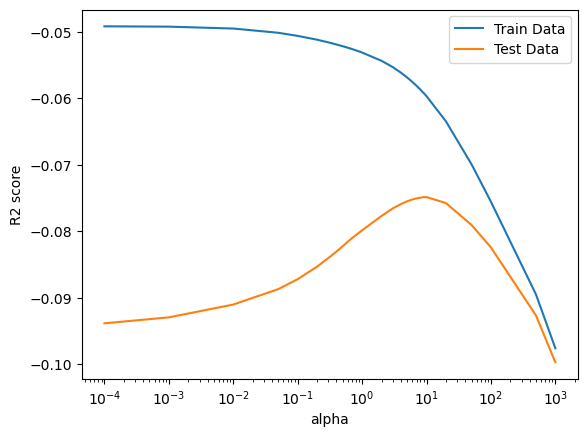

In [61]:
# lets plot R2 score against alpha values which can help us to understand the relationship between the model's 
# performance (measured by R2 score) and the regularization strength, represented by the alpha values using visualization

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'], label='Train Data')
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'], label='Test Data')
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.xscale('log')
plt.legend()
plt.show()

> As alpha values increase, the training error consistently decreases. However, for the testing error, there's an initial rise followed by a decline. Looking at the graph, it becomes clear that the optimal alpha value is 10

#### 2 -  Lasso Regression

> Lasso Regression is a way to build a simpler and more understandable model when you have lots of factors that might influence something. It works by focusing on the most important factors and ignoring the less important ones.

> Imagine you're trying to predict a house's price using many different factors like size, number of rooms, location, etc. Lasso Regression helps by figuring out which factors really matter the most in deciding the house price. It does this by setting some less important factors to zero, making the model easier to understand and preventing it from getting too complicated. This way, it selects the most essential factors and helps in making better predictions without using unnecessary information.

In [62]:
# Setting up a Lasso Regression model and performing cross-validation to find the best alpha value

# Defining a range of alpha values to try during cross-validation
alpha_values_to_test = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                        2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]

# Initializing the Lasso Regression model
lasso_model = Lasso()

# Defining parameters for cross-validation
parameters_for_cv = {'alpha': alpha_values_to_test}  # List of alpha values to be tested
scoring_method = 'neg_mean_absolute_error'  # Scoring method used for evaluation
cross_validation_folds = 5  # Number of cross-validation folds

# Setting up GridSearchCV for cross-validation
lasso_cv = GridSearchCV(estimator=lasso_model,
                        param_grid=parameters_for_cv,
                        scoring=scoring_method,
                        cv=cross_validation_folds,
                        return_train_score=True,
                        verbose=1,  # Shows progress during computation
                        n_jobs=-1)  # Utilizes all available CPU cores for computation

# Fitting the Lasso Regression model using GridSearchCV on the training data
lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
# lets check the optimum value of alpha
lasso_cv.best_params_

{'alpha': 0.001}

In [64]:
# lets check the results of cross validation search

lasso_cv.cv_results_

{'mean_fit_time': array([0.32589893, 0.12133131, 0.04380107, 0.03651433, 0.03310518,
        0.02461481, 0.02299919, 0.02700391, 0.02351522, 0.02339973,
        0.02660027, 0.02320828, 0.02730355, 0.03161044, 0.02941155,
        0.02273712, 0.02300196, 0.02340117, 0.02271519, 0.02210426,
        0.02840371, 0.02490916, 0.02187281, 0.02821302, 0.02240882,
        0.02499976, 0.0234036 , 0.02550845]),
 'std_fit_time': array([0.06002069, 0.06239267, 0.00503224, 0.00688518, 0.00575929,
        0.00107286, 0.00189803, 0.00576373, 0.00212212, 0.00102039,
        0.0058509 , 0.00225135, 0.00384992, 0.00845816, 0.01307062,
        0.0013908 , 0.00089367, 0.00162549, 0.00225018, 0.00111694,
        0.00331926, 0.00297789, 0.0004925 , 0.00393931, 0.00086314,
        0.00267706, 0.00102037, 0.00305165]),
 'mean_score_time': array([0.01270466, 0.01301093, 0.00960369, 0.00899968, 0.00902085,
        0.00960441, 0.0099999 , 0.01250772, 0.00900021, 0.00920191,
        0.00900717, 0.01010714, 0.009400

##### After analysis, we've found the best alpha value to be 0.001. We'll now proceed to create a Lasso Regression model utilizing this identified alpha value.

In [66]:
# Now we are creating lasso regression object with alpha = 0.001

lasso = Lasso(alpha=0.001)

In [67]:
# lets apply the model on training data

lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [68]:
# lets see the coefficients of lasso applied or fitted model

lasso.coef_

array([ 3.32682408e-03,  2.16451599e-02,  2.86137657e-02, -0.00000000e+00,
        2.58744193e-02,  1.54710949e-03, -0.00000000e+00,  4.26216769e-02,
       -0.00000000e+00,  1.06155389e-02,  0.00000000e+00,  1.06041784e-01,
        9.12081960e-03,  0.00000000e+00,  6.21173109e-03,  9.99869860e-03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.25705165e-02,
        1.92103380e-02,  1.94273494e-02,  1.12714413e-02,  7.92455346e-03,
        1.78530093e-03,  0.00000000e+00,  1.05985103e-02,  0.00000000e+00,
        0.00000000e+00, -7.58249012e-05, -5.22898052e-02, -3.01060185e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        3.05179688e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.64536115e-02,  0.00000000e+00, -4.41801750e-02, -0.00000000e+00,
       -0.00000000e+00,  3.77888104e-03,  0.00000000e+00,  0.00000000e+00,
       -3.73748455e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [69]:
# lets move ahead with predictions 

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [70]:
# lets get the metrics using calculate_metrics() method and check it 

lasso_metrix = calculate_metrics([y_train, y_test], [y_train_pred, y_pred])

R-Squared (Train) = 0.92
R-Squared (Test) = 0.93
RSS (Train) = 11.29
RSS (Test) = 2.92
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.10


#### Again the next step would be the same which we have done earlier during ridge regression, we'll create a plot showcasing the R2 Score variation across a range of alpha values for both the training and testing datasets.

In [71]:
# lets create pandas dataframe of lasso cross validation results 
lasso_cv_results = pd.DataFrame(lasso_cv.cv_results_)

lasso_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.325899      0.060021         0.012705        0.000595      0.0001   
1        0.121331      0.062393         0.013011        0.004112       0.001   
2        0.043801      0.005032         0.009604        0.001858        0.01   
3        0.036514      0.006885         0.009000        0.001414        0.05   
4        0.033105      0.005759         0.009021        0.000896         0.1   
5        0.024615      0.001073         0.009604        0.002310         0.2   
6        0.022999      0.001898         0.010000        0.001549         0.3   
7        0.027004      0.005764         0.012508        0.004366         0.4   
8        0.023515      0.002122         0.009000        0.000632         0.5   
9        0.023400      0.001020         0.009202        0.000748         0.6   
10       0.026600      0.005851         0.009007        0.000636         0.7   
11       0.023208      0.002251         0.010107        0.001433         0.8   
12       0.027304      0.003850         0.009401        0.001020         0.9   
13       0.031610      0.008458         0.012200        0.004118         1.0   
14       0.029412      0.013071         0.012200        0.004020         2.0   
15       0.022737      0.001391         0.012570        0.005736         3.0   
16       0.023002      0.000894         0.010106        0.002011         4.0   
17       0.023401      0.001625         0.009609        0.001535         5.0   
18       0.022715      0.002250         0.008403        0.000490         6.0   
19       0.022104      0.001117         0.008904        0.000661         7.0   
20       0.028404      0.003319         0.009936        0.001086         8.0   
21       0.024909      0.002978         0.009504        0.001556         9.0   
22       0.021873      0.000492         0.008999        0.000631        10.0   
23       0.028213      0.003939         0.011007        0.003277          20   
24       0.022409      0.000863         0.008704        0.000751          50   
25       0.025000      0.002677         0.008998        0.000633         100   
26       0.023404      0.001020         0.010404        0.002850         500   
27       0.025508      0.003052         0.007902        0.001023        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.069359          -0.081482   
1    {'alpha': 0.001}          -0.068861          -0.081934   
2     {'alpha': 0.01}          -0.091298          -0.110751   
3     {'alpha': 0.05}          -0.109268          -0.132709   
4      {'alpha': 0.1}          -0.144592          -0.168175   
5      {'alpha': 0.2}          -0.239648          -0.251524   
6      {'alpha': 0.3}          -0.274800          -0.286080   
7      {'alpha': 0.4}          -0.274800          -0.286080   
8      {'alpha': 0.5}          -0.274800          -0.286080   
9      {'alpha': 0.6}          -0.274800          -0.286080   
10     {'alpha': 0.7}          -0.274800          -0.286080   
11     {'alpha': 0.8}          -0.274800          -0.286080   
12     {'alpha': 0.9}          -0.274800          -0.286080   
13     {'alpha': 1.0}          -0.274800          -0.286080   
14     {'alpha': 2.0}          -0.274800          -0.286080   
15     {'alpha': 3.0}          -0.274800          -0.286080   
16     {'alpha': 4.0}          -0.274800          -0.286080   
17     {'alpha': 5.0}          -0.274800          -0.286080   
18     {'alpha': 6.0}          -0.274800          -0.286080   
19     {'alpha': 7.0}          -0.274800          -0.286080   
20     {'alpha': 8.0}          -0.274800          -0.286080   
21     {'alpha': 9.0}          -0.274800          -0.286080   
22    {'alpha': 10.0}          -0.274800          -0.286080   
23      {'alpha': 20}          -0.274800          -0.286080   
24      {'alpha': 50}          -0.274800          -0.286080   
25     {'alpha': 100}          -0.274800     

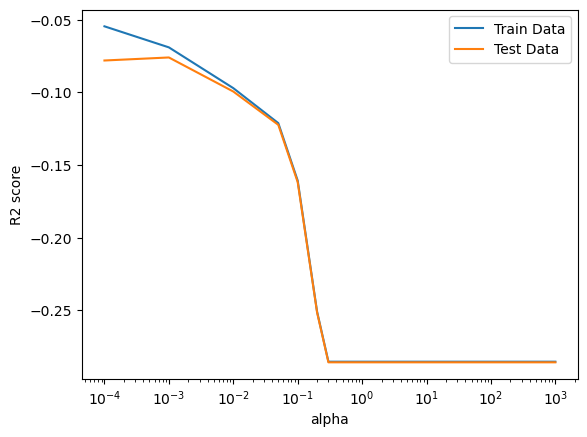

In [72]:
# again lets plot R2 score against alpha values which can help us to understand the relationship between the model's 
# performance (measured by R2 score) and the regularization strength, represented by the alpha values using visualization

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'], label='Train Data')
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'], label='Test Data')
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.xscale('log')
plt.legend()
plt.show()

#### When the alpha value rises, we notice a decline in both the training and testing errors. Yet, beyond an error value of roughly 0.05, the error levels off and remains consistent without further reduction.

## Step 7 - Analysing and comparing Ridge and Lasso model 

In [77]:
# lets create table where we are going to include all the metrics which can help us in analysis and comparision 

comparision_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Model' : ridge_metrix,
            'Lasso Model' : lasso_metrix
        }

final_metric = pd.DataFrame(comparision_table, columns = ['Metric', 'Ridge Model', 'Lasso Model'] )
final_metric.set_index('Metric')

Ridge Model  Lasso Model
Metric                                    
R2 Score (Train)         0.94         0.92
R2 Score (Test)          0.93         0.93
RSS (Train)              8.53        11.29
RSS (Test)               2.87         2.92
MSE (Train)              0.01         0.01
MSE (Test)               0.01         0.01
RMSE (Train)             0.09         0.10
RMSE (Test)              0.10         0.10

In [76]:
# lets set float option decimal point to 2f and execute above cell once again
pd.options.display.float_format = "{:,.2f}".format

#### Both the Ridge Regression and Lasso models exhibit an R2 score of 0.93 on the test data, showcasing an equivalent performance level for both models

In [78]:
# lets check the changes in coefficients after regularizations

# Creating an empty DataFrame with independent variables as indices
independent_variables = X.columns
betas = pd.DataFrame(index=independent_variables)

# Displaying the created DataFrame
betas

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, PropertyAge, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, ...]

In [79]:
# lets add values of betas as one column for ridge and another for lasso coefficients 

betas["Ridge_Coeff"] = ridge.coef_
betas["Lasso_Coeff"] =  lasso.coef_

In [80]:
# lets check the added columns in betas

betas

Ridge_Coeff  Lasso_Coeff
LotFrontage                   0.01         0.00
LotArea                       0.02         0.02
YearRemodAdd                  0.02         0.03
MasVnrArea                   -0.00        -0.00
BsmtFinSF1                    0.01         0.03
BsmtFinSF2                   -0.00         0.00
BsmtUnfSF                    -0.01        -0.00
TotalBsmtSF                   0.05         0.04
1stFlrSF                      0.01        -0.00
2ndFlrSF                      0.03         0.01
LowQualFinSF                  0.00         0.00
GrLivArea                     0.09         0.11
BsmtFullBath                  0.01         0.01
BsmtHalfBath                 -0.00         0.00
FullBath                      0.01         0.01
HalfBath                      0.01         0.01
BedroomAbvGr                  0.00         0.00
KitchenAbvGr                  0.00         0.00
TotRmsAbvGrd                 -0.00        -0.00
Fireplaces                    0.02         0.02
GarageCars                    0.02         0.02
GarageArea                    0.02         0.02
WoodDeckSF                    0.01         0.01
OpenPorchSF                   0.01         0.01
EnclosedPorch                 0.00         0.00
3SsnPorch                     0.00         0.00
ScreenPorch                   0.01         0.01
PoolArea                      0.00         0.00
MiscVal                       0.00         0.00
MoSold                       -0.00        -0.00
PropertyAge                  -0.05        -0.05
MSSubClass_30                -0.04        -0.00
MSSubClass_40                 0.01         0.00
MSSubClass_45                 0.00         0.00
MSSubClass_50                -0.00         0.00
MSSubClass_60                -0.01        -0.00
MSSubClass_70                 0.04         0.03
MSSubClass_75                 0.03         0.00
MSSubClass_80                 0.00         0.00
MSSubClass_85                 0.00         0.00
MSSubClass_90                -0.03        -0.02
MSSubClass_120                0.01         0.00
MSSubClass_160               -0.05        -0.04
MSSubClass_180               -0.01        -0.00
MSSubClass_190               -0.02        -0.00
MSZoning_FV                   0.04         0.00
MSZoning_RH                   0.01         0.00
MSZoning_RL                   0.01         0.00
MSZoning_RM                  -0.02        -0.04
Street_Pave                  -0.01        -0.00
Alley_None                   -0.01        -0.00
Alley_Pave                    0.02         0.00
LotShape_IR2                  0.01         0.00
LotShape_IR3                 -0.02        -0.00
LotShape_Reg                  0.00        -0.00
LandContour_HLS               0.03         0.00
LandContour_Low               0.01         0.00
LandContour_Lvl               0.02        -0.00
Utilities_NoSeWa             -0.01        -0.00
LotConfig_CulDSac             0.03         0.02
LotConfig_FR2                -0.02        -0.00
LotConfig_FR3                -0.00        -0.00
LotConfig_Inside             -0.00         0.00
LandSlope_Mod                -0.00         0.00
LandSlope_Sev                 0.03         0.00
Neighborhood_Blueste         -0.00        -0.00
Neighborhood_BrDale          -0.00        -0.00
Neighborhood_BrkSide          0.03         0.03
Neighborhood_ClearCr          0.03         0.00
Neighborhood_CollgCr         -0.02        -0.00
Neighborhood_Crawfor          0.08         0.09
Neighborhood_Edwards         -0.05        -0.03
Neighborhood_Gilbert         -0.01        -0.00
Neighborhood_IDOTRR           0.00         0.00
Neighborhood_MeadowV         -0.07        -0.03
Neighborhood_Mitchel         -0.03        -0.00
Neighborhood_NAmes           -0.03        -0.00
Neighborhood_NPkVill          0.01         0.00
Neighborhood_NWAmes          -0.02        -0.00
Neighborhood_NoRidge          0.01         0.00
Neighborhood_NridgHt          0.04         0.02
Neighborhood_OldTown         -0.02        -0.00
Neighborhood_SWISU            0.01     

In [83]:
# Now lets check out the removed features or columns by Lasso
removed_cols_by_lasso = betas[betas["Lasso_Coeff"]==0]

removed_cols_by_lasso

Ridge_Coeff  Lasso_Coeff
MasVnrArea                   -0.00        -0.00
BsmtUnfSF                    -0.01        -0.00
1stFlrSF                      0.01        -0.00
LowQualFinSF                  0.00         0.00
BsmtHalfBath                 -0.00         0.00
BedroomAbvGr                  0.00         0.00
KitchenAbvGr                  0.00         0.00
TotRmsAbvGrd                 -0.00        -0.00
3SsnPorch                     0.00         0.00
PoolArea                      0.00         0.00
MiscVal                       0.00         0.00
MSSubClass_40                 0.01         0.00
MSSubClass_45                 0.00         0.00
MSSubClass_50                -0.00         0.00
MSSubClass_60                -0.01        -0.00
MSSubClass_75                 0.03         0.00
MSSubClass_80                 0.00         0.00
MSSubClass_85                 0.00         0.00
MSSubClass_120                0.01         0.00
MSSubClass_180               -0.01        -0.00
MSSubClass_190               -0.02        -0.00
MSZoning_RH                   0.01         0.00
MSZoning_RL                   0.01         0.00
Street_Pave                  -0.01        -0.00
Alley_None                   -0.01        -0.00
Alley_Pave                    0.02         0.00
LotShape_IR2                  0.01         0.00
LotShape_IR3                 -0.02        -0.00
LandContour_HLS               0.03         0.00
LandContour_Low               0.01         0.00
LandContour_Lvl               0.02        -0.00
Utilities_NoSeWa             -0.01        -0.00
LotConfig_FR2                -0.02        -0.00
LotConfig_FR3                -0.00        -0.00
LotConfig_Inside             -0.00         0.00
LandSlope_Mod                -0.00         0.00
LandSlope_Sev                 0.03         0.00
Neighborhood_Blueste         -0.00        -0.00
Neighborhood_BrDale          -0.00        -0.00
Neighborhood_CollgCr         -0.02        -0.00
Neighborhood_Gilbert         -0.01        -0.00
Neighborhood_IDOTRR           0.00         0.00
Neighborhood_Mitchel         -0.03        -0.00
Neighborhood_NAmes           -0.03        -0.00
Neighborhood_NPkVill          0.01         0.00
Neighborhood_NWAmes          -0.02        -0.00
Neighborhood_NoRidge          0.01         0.00
Neighborhood_SWISU            0.01         0.00
Neighborhood_Sawyer          -0.02        -0.00
Neighborhood_SawyerW         -0.02        -0.00
Neighborhood_Timber           0.01         0.00
Neighborhood_Veenker          0.02         0.00
Condition1_Feedr             -0.00        -0.00
Condition1_PosA               0.01         0.00
Condition1_PosN               0.02         0.00
Condition1_RRAe              -0.03        -0.00
Condition1_RRAn               0.01         0.00
Condition1_RRNe               0.00         0.00
Condition1_RRNn               0.02         0.00
Condition2_Feedr             -0.00        -0.00
Condition2_Norm               0.03         0.00
Condition2_PosA               0.03         0.00
Condition2_PosN              -0.03        -0.00
Condition2_RRAe              -0.00        -0.00
Condition2_RRAn              -0.01        -0.00
Condition2_RRNn               0.01         0.00
BldgType_2fmCon              -0.02        -0.00
BldgType_TwnhsE              -0.02        -0.00
HouseStyle_1.5Unf             0.00         0.00
HouseStyle_1Story             0.02        -0.00
HouseStyle_2.5Fin             0.01         0.00
HouseStyle_2.5Unf            -0.01         0.00
HouseStyle_SFoyer             0.01         0.00
HouseStyle_SLvl               0.02         0.00
OverallQual_2                -0.00        -0.00
OverallQual_6                -0.01         0.00
OverallQual_10               -0.02        -0.00
OverallCond_2                -0.03        -0.00
OverallCond_6                 0.02         0.00
RoofStyle_Gable              -0.02        -0.00
RoofStyle_Gambrel            -0.00         0.00
RoofStyle_Hip                -0.02        -0.00
RoofStyle_Mansard             0.02     

In [84]:
# lets check the shape of removed features by lasso to know the exact number

removed_cols_by_lasso.shape

(306, 2)

In [86]:
# lets check the selected feature or columns by lasso 

selected_cols_by_lasso = betas.loc[betas["Lasso_Coeff"]!=0, 'Lasso_Coeff']

selected_cols_by_lasso

LotFrontage              0.00
LotArea                  0.02
YearRemodAdd             0.03
BsmtFinSF1               0.03
BsmtFinSF2               0.00
TotalBsmtSF              0.04
2ndFlrSF                 0.01
GrLivArea                0.11
BsmtFullBath             0.01
FullBath                 0.01
HalfBath                 0.01
Fireplaces               0.02
GarageCars               0.02
GarageArea               0.02
WoodDeckSF               0.01
OpenPorchSF              0.01
EnclosedPorch            0.00
ScreenPorch              0.01
MoSold                  -0.00
PropertyAge             -0.05
MSSubClass_30           -0.00
MSSubClass_70            0.03
MSSubClass_90           -0.02
MSSubClass_160          -0.04
MSZoning_FV              0.00
MSZoning_RM             -0.04
LotShape_Reg            -0.00
LotConfig_CulDSac        0.02
Neighborhood_BrkSide     0.03
Neighborhood_ClearCr     0.00
Neighborhood_Crawfor     0.09
Neighborhood_Edwards    -0.03
Neighborhood_MeadowV    -0.03
Neighborho

In [87]:
# lets check the shape of selected columns by lasso

selected_cols_by_lasso.shape

(78,)

#### Lasso has effectively removed 306 out of the initial 384 features present in X_train. This showcases the feature selection capability of Lasso, where it identifies and eliminates less crucial features, leaving only the most relevant ones for modeling purposes.

## Step 8 - Analysis Or Inferences

#### Next, we'll examine the top 10 features that hold significant importance in predicting house values according to both the Ridge and Lasso models

In [88]:
# top 10 coefficients of Ridge regression 

betas["Ridge_Coeff"].sort_values(ascending=False)[:10]

GrLivArea              0.09
OverallQual_9          0.08
OverallQual_8          0.08
Neighborhood_Crawfor   0.08
OverallCond_9          0.07
Functional_Typ         0.07
Exterior1st_BrkFace    0.07
SaleCondition_Alloca   0.06
CentralAir_Y           0.05
TotalBsmtSF            0.05
Name: Ridge_Coeff, dtype: float64

In [89]:
# To understand the impact of Ridge coefficients on the target variable, we use the exponential function (inverse log).
# This helps us view the coefficients in a more interpretable way with respect to the target.

# Calculating exponential of Ridge coefficients to interpret their impact on the target variable
ridge_coefficients = np.exp(betas['Ridge_Coeff'])

# Sorting the coefficients in descending order to find the top 10 significant features
top_10_ridge_coeffs = ridge_coefficients.sort_values(ascending=False)[:10]
top_10_ridge_coeffs

GrLivArea              1.09
OverallQual_9          1.08
OverallQual_8          1.08
Neighborhood_Crawfor   1.08
OverallCond_9          1.08
Functional_Typ         1.07
Exterior1st_BrkFace    1.07
SaleCondition_Alloca   1.07
CentralAir_Y           1.06
TotalBsmtSF            1.05
Name: Ridge_Coeff, dtype: float64

In [91]:
# Displaying the top 10 coefficients of Lasso in descending order to identify the most influential features.
betas['Lasso_Coeff'].sort_values(ascending=False)[:10]


OverallQual_9          0.12
GrLivArea              0.11
OverallQual_8          0.10
Neighborhood_Crawfor   0.09
Exterior1st_BrkFace    0.08
Functional_Typ         0.08
CentralAir_Y           0.05
Neighborhood_Somerst   0.04
TotalBsmtSF            0.04
Condition1_Norm        0.04
Name: Lasso_Coeff, dtype: float64

In [93]:
# Transforming Lasso coefficients using the exponential function to interpret their impact on the target variable.
# This process enables a more understandable view of the coefficients with respect to the target.
lasso_coefficients = np.exp(betas['Lasso_Coeff'])

# Sorting the transformed coefficients in descending order to determine the top 10 significant features.
top_10_lasso_coeffs = lasso_coefficients.sort_values(ascending=False)[:10]
top_10_lasso_coeffs

OverallQual_9          1.13
GrLivArea              1.11
OverallQual_8          1.11
Neighborhood_Crawfor   1.09
Exterior1st_BrkFace    1.08
Functional_Typ         1.08
CentralAir_Y           1.05
Neighborhood_Somerst   1.04
TotalBsmtSF            1.04
Condition1_Norm        1.04
Name: Lasso_Coeff, dtype: float64


## Findings:
### Key Factors Influencing House Prices:
> The important variables contributing to house price prediction include:
GrLivArea, OverallQual_9, OverallCond_9, OverallQual_8, Neighborhood_Crawfor, Functional_Typ, Exterior1st_BrkFace, SaleCondition_Alloca, CentralAir_Y, TotalBsmtSF, Neighborhood_Somerst, TotalBsmtSF, and Condition1_Norm.

### Impact of Significant Variables on House Prices:
#### Let's focus on the top few variables:

- GrLivArea: A 1 square foot increase in above-ground house area correlates to a 1.09 to 1.11 times increase in price.
- OverallQual_9 & OverallQual_8: If the overall quality of the house is rated as Very Good or Excellent, the house price can increase by 1.08 to 1.13 times.
- Neighborhood_Crawfor: Living in the Crawford neighborhood may lead to a 1.07 to 1.09 times increase in house price.
- Functional_Typ: Homes with typical functionality may raise the house price by 1.07 to 1.08 times.
- Exterior1st_BrkFace: A house with a Brick Face exterior could potentially increase the price by 1.07 to 1.08 times.

This approach helps us understand the impact of each variable on house prices.

### Best Ridge Regression Lambda Value = 10
### Optimal Lasso Lambda Value = 0.001

## Problem Statement Part II

### Question 1

> What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### Answer-

- Optimal value of alpha for Ridge model = 10
- Optimal value of alpha for Lasso model = 0.001

In [94]:
# lets try to find the answer for this Question 1 by building the ridge regression model with double the value of alpha which is 20(earlier it was 10)

ridge = Ridge(alpha=20)

# lets fit the mode on training data
ridge.fit(X_train, y_train)


Ridge(alpha=20)

In [95]:
# lets predict 

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [96]:
# lets check metrics using calculate_metrics() method

ridge_metrix = calculate_metrics([y_train, y_test], [y_train_pred, y_test_pred])

R-Squared (Train) = 0.93
R-Squared (Test) = 0.93
RSS (Train) = 9.37
RSS (Test) = 2.82
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


In [97]:
# lets build the Lasso model with double alpha which is 0.002(which was earlier 0.001)

lasso = Lasso(alpha=0.002)

# lets fit the model on training data

lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [98]:
# lets do predictions
y_train_pred = lasso.predict(X_train)

y_test_pred = lasso.predict(X_test)

In [99]:
# lets check metrics using calculate_metrics() method

lasso_metrix = calculate_metrics([y_train, y_test], [y_train_pred, y_test_pred])

R-Squared (Train) = 0.91
R-Squared (Test) = 0.91
RSS (Train) = 13.49
RSS (Test) = 3.45
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.11
RMSE (Test) = 0.11


In [100]:
# lets create table which we created earlier which contain all the metrics for comparision purpose


comp_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Model' : ridge_metrix,
            'Lasso Model' : lasso_metrix
        }

final_metric = pd.DataFrame(comp_table, columns = ['Metric', 'Ridge Model', 'Lasso Model'] )
final_metric.set_index('Metric')

Ridge Model  Lasso Model
Metric                                    
R2 Score (Train)         0.93         0.91
R2 Score (Test)          0.93         0.91
RSS (Train)              9.37        13.49
RSS (Test)               2.82         3.45
MSE (Train)              0.01         0.01
MSE (Test)               0.01         0.01
RMSE (Train)             0.09         0.11
RMSE (Test)              0.10         0.11

###  Updates in Ridge Regression Metrics-
- R2 score for the training set saw a slight decrease from 0.94 to 0.93.
- The R2 score for the test set remained constant at 0.93.

### Updates  in Lasso Regression Metrics-
- R2 score for the training set saw a slight decrease from 0.92 to 0.91.
- The R2 score for the test set saw a slight decrease from 0.93 to 0.91

In [102]:
# lets check the changes in coefficients after regularization

# Creating an empty DataFrame with independent variables as indices to store coefficients after regularization
betas = pd.DataFrame(index=X.columns)

# Displaying the initialized DataFrame
betas

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, PropertyAge, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, ...]

In [103]:
# Assigning Ridge coefficients to the 'Ridge_Coeff' column and Lasso coefficients to the 'Lasso_Coeff' column in the 'betas' DataFrame
betas['Ridge_Coeff'] = ridge.coef_
betas['Lasso_Coeff'] = lasso.coef_

In [104]:
# lets view the betas

betas

Ridge_Coeff  Lasso_Coeff
LotFrontage                   0.01         0.00
LotArea                       0.02         0.02
YearRemodAdd                  0.03         0.04
MasVnrArea                   -0.00        -0.00
BsmtFinSF1                    0.02         0.03
BsmtFinSF2                    0.00         0.00
BsmtUnfSF                    -0.01        -0.00
TotalBsmtSF                   0.05         0.05
1stFlrSF                      0.01        -0.00
2ndFlrSF                      0.03         0.01
LowQualFinSF                  0.00         0.00
GrLivArea                     0.08         0.11
BsmtFullBath                  0.01         0.01
BsmtHalfBath                 -0.00         0.00
FullBath                      0.01         0.00
HalfBath                      0.01         0.01
BedroomAbvGr                  0.00        -0.00
KitchenAbvGr                  0.00         0.00
TotRmsAbvGrd                  0.00        -0.00
Fireplaces                    0.02         0.03
GarageCars                    0.02         0.02
GarageArea                    0.02         0.02
WoodDeckSF                    0.01         0.01
OpenPorchSF                   0.01         0.01
EnclosedPorch                 0.00         0.00
3SsnPorch                     0.00         0.00
ScreenPorch                   0.01         0.01
PoolArea                      0.00         0.00
MiscVal                       0.00         0.00
MoSold                       -0.00        -0.00
PropertyAge                  -0.05        -0.05
MSSubClass_30                -0.03        -0.00
MSSubClass_40                 0.00         0.00
MSSubClass_45                 0.00         0.00
MSSubClass_50                -0.00         0.00
MSSubClass_60                -0.01        -0.00
MSSubClass_70                 0.04         0.01
MSSubClass_75                 0.02         0.00
MSSubClass_80                 0.00         0.00
MSSubClass_85                 0.00         0.00
MSSubClass_90                -0.03        -0.00
MSSubClass_120                0.01         0.00
MSSubClass_160               -0.04        -0.01
MSSubClass_180               -0.01        -0.00
MSSubClass_190               -0.02        -0.00
MSZoning_FV                   0.03         0.00
MSZoning_RH                   0.01        -0.00
MSZoning_RL                   0.01         0.00
MSZoning_RM                  -0.03        -0.03
Street_Pave                  -0.00         0.00
Alley_None                   -0.00        -0.00
Alley_Pave                    0.01         0.00
LotShape_IR2                  0.01         0.00
LotShape_IR3                 -0.02        -0.00
LotShape_Reg                 -0.00        -0.00
LandContour_HLS               0.03         0.00
LandContour_Low               0.01         0.00
LandContour_Lvl               0.01        -0.00
Utilities_NoSeWa             -0.01        -0.00
LotConfig_CulDSac             0.02         0.00
LotConfig_FR2                -0.01        -0.00
LotConfig_FR3                -0.00         0.00
LotConfig_Inside              0.00         0.00
LandSlope_Mod                -0.00         0.00
LandSlope_Sev                 0.02         0.00
Neighborhood_Blueste         -0.00        -0.00
Neighborhood_BrDale          -0.00        -0.00
Neighborhood_BrkSide          0.03         0.00
Neighborhood_ClearCr          0.02         0.00
Neighborhood_CollgCr         -0.01        -0.00
Neighborhood_Crawfor          0.06         0.07
Neighborhood_Edwards         -0.05        -0.03
Neighborhood_Gilbert         -0.01        -0.00
Neighborhood_IDOTRR           0.00         0.00
Neighborhood_MeadowV         -0.05        -0.00
Neighborhood_Mitchel         -0.03        -0.00
Neighborhood_NAmes           -0.02        -0.00
Neighborhood_NPkVill          0.01         0.00
Neighborhood_NWAmes          -0.02        -0.00
Neighborhood_NoRidge          0.00        -0.00
Neighborhood_NridgHt          0.03         0.00
Neighborhood_OldTown         -0.02        -0.00
Neighborhood_SWISU            0.00     

 ### Important predictors after the change

In [105]:
# Displaying the top 10 coefficients of Ridge regression in descending order to identify the most important predictor variables
top_10_ridge_coeffs = betas['Ridge_Coeff'].sort_values(ascending=False)[:10]
top_10_ridge_coeffs

GrLivArea              0.08
OverallQual_8          0.07
OverallQual_9          0.06
Neighborhood_Crawfor   0.06
Functional_Typ         0.06
Exterior1st_BrkFace    0.06
OverallCond_9          0.05
TotalBsmtSF            0.05
CentralAir_Y           0.05
OverallCond_7          0.04
Name: Ridge_Coeff, dtype: float64

In [106]:
# Transforming Ridge coefficients for better interpretation in terms of the target variable
ridge_coeffs = np.exp(betas['Ridge_Coeff'])

# Sorting and displaying the top 10 transformed coefficients in descending order
top_10_transformed_ridge_coeffs = ridge_coeffs.sort_values(ascending=False)[:10]
top_10_transformed_ridge_coeffs

GrLivArea              1.08
OverallQual_8          1.07
OverallQual_9          1.07
Neighborhood_Crawfor   1.07
Functional_Typ         1.06
Exterior1st_BrkFace    1.06
OverallCond_9          1.06
TotalBsmtSF            1.05
CentralAir_Y           1.05
OverallCond_7          1.04
Name: Ridge_Coeff, dtype: float64

In [107]:
# Displaying the top 10 coefficients of Lasso regression in descending order to identify the most important predictor variables
top_10_lasso_coeffs = betas['Lasso_Coeff'].sort_values(ascending=False)[:10]
top_10_lasso_coeffs

GrLivArea              0.11
OverallQual_8          0.08
OverallQual_9          0.08
Functional_Typ         0.07
Neighborhood_Crawfor   0.07
TotalBsmtSF            0.05
Exterior1st_BrkFace    0.04
CentralAir_Y           0.04
YearRemodAdd           0.04
Condition1_Norm        0.03
Name: Lasso_Coeff, dtype: float64

In [108]:
# Transforming Lasso coefficients for better interpretation in terms of the target variable
lasso_coeffs = np.exp(betas['Lasso_Coeff'])

# Sorting and displaying the top 10 transformed coefficients in descending order
top_10_transformed_lasso_coeffs = lasso_coeffs.sort_values(ascending=False)[:10]
top_10_transformed_lasso_coeffs

GrLivArea              1.11
OverallQual_8          1.09
OverallQual_9          1.08
Functional_Typ         1.07
Neighborhood_Crawfor   1.07
TotalBsmtSF            1.05
Exterior1st_BrkFace    1.05
CentralAir_Y           1.04
YearRemodAdd           1.04
Condition1_Norm        1.03
Name: Lasso_Coeff, dtype: float64

### Hence, the most significant predictor variables after doubling the alpha values are-

- GrLivArea
- OverallQual_8
- OverallQual_9
- Functional_Typ
- Neighborhood_Crawfor
- Exterior1st_BrkFace
- TotalBsmtSF
- CentralAir_Y

### Question 3

> After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

### Answer-

> Upon discovering that the five most crucial predictor variables identified by the Lasso model are absent in the incoming data, the next step is to construct a new model. This new model will exclude these five essential predictors.

> The previously highlighted top 5 predictors in the Lasso model consisted of: 
> - OverallQual_9 
> - GrLivArea
> - OverallQual_8
> - Neighborhood_Crawfor
> - Exterior1st_BrkFace.

In [109]:
# Define a list containing the top 5 Lasso predictors to be excluded
top_5_lasso_predictors = [
    'OverallQual_9',
    'GrLivArea',
    'OverallQual_8',
    'Neighborhood_Crawfor',
    'Exterior1st_BrkFace'
]

In [110]:
# lets drop top_5_lasso_predictors from train and test dataset

X_train_dropped = X_train.drop(top_5_lasso_predictors, axis=1)
X_test_dropped = X_test.drop(top_5_lasso_predictors, axis=1)

In [111]:
# Setting up a Lasso model and performing cross-validation to determine the optimal alpha value

# Define a range of alpha values for cross-validation
alpha_values = [
    0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000
]

# Initialize a Lasso model
lasso_model = Lasso()

# Configuring GridSearchCV for cross-validation
lasso_params = {'alpha': alpha_values}  # Alpha values to test
scoring_method = 'neg_mean_absolute_error'  # Scoring method for evaluation
cv_folds = 5  # Number of cross-validation folds

# Setting up GridSearchCV for Lasso regression
lasso_cv = GridSearchCV(
    estimator=lasso_model,
    param_grid=lasso_params,
    scoring=scoring_method,
    cv=cv_folds,
    return_train_score=True,
    verbose=1,  # Display progress during computation
    n_jobs=-1  # Use all available CPU cores
)

# Fitting the Lasso model using GridSearchCV on the modified training data (X_train_dropped)
lasso_cv.fit(X_train_dropped, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [112]:
# check the optimal value of alpha
lasso_cv.best_params_

{'alpha': 0.001}

### Therefore, having identified the optimal alpha value as 0.001 through the cross-validation process, we will proceed to construct a Lasso regression model utilizing this determined value.

In [113]:
# lets create Lasso object with optimal value of alpha = 0.001

lasso = Lasso(alpha= 0.001)

In [114]:
# lets fit the model on  updated training data 
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.001)

In [115]:
# lets go for next step which is making predictions

y_train_pred = lasso.predict(X_train_dropped)

y_test_pred = lasso.predict(X_test_dropped)

In [116]:
# now need to check the metrics

lasso_metrix = calculate_metrics([y_train,y_test],[y_train_pred,y_test_pred])

R-Squared (Train) = 0.91
R-Squared (Test) = 0.92
RSS (Train) = 12.75
RSS (Test) = 3.02
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.10


#### Find top 5 predictors-

In [119]:
# Creating a table to store all the metrics for Lasso Regression
compar_table = {
    'Metric': [
        'R2 Score (Train)', 'R2 Score (Test)', 'RSS (Train)', 'RSS (Test)',
        'MSE (Train)', 'MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'
    ],
    'Lasso Model': lasso_metrix  # Assuming lasso_metrics contains the respective metric values
}

# Creating a DataFrame to hold the Lasso Regression metrics
final_metric = pd.DataFrame(compar_table, columns=['Metric', 'Lasso Model'])

# Setting 'Metric' column as the index for better readability
final_metric.set_index('Metric', inplace=True)

In [120]:
# lets check the table
final_metric

Lasso Model
Metric                       
R2 Score (Train)         0.91
R2 Score (Test)          0.92
RSS (Train)             12.75
RSS (Test)               3.02
MSE (Train)              0.01
MSE (Test)               0.01
RMSE (Train)             0.10
RMSE (Test)              0.10

In [121]:
# Creating an empty DataFrame 'betas' with independent variables as indices
betas = pd.DataFrame(index=X_train_dropped.columns)

# Setting DataFrame rows attribute to the columns of X_train_dropped
betas.index = X_train_dropped.columns

# Displaying the initialized DataFrame 'betas'
betas

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, PropertyAge, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, Condition2_PosN, Condition2_RRAe, ...]

In [122]:
# Assigning Lasso coefficients to the 'Lasso' column in the 'betas' DataFrame
betas['Lasso_Coeff'] = lasso.coef_

In [123]:
# lets dispaly betas

betas

Lasso_Coeff
LotFrontage                   0.00
LotArea                       0.02
YearRemodAdd                  0.03
MasVnrArea                   -0.00
BsmtFinSF1                    0.03
BsmtFinSF2                    0.00
BsmtUnfSF                    -0.00
TotalBsmtSF                   0.05
1stFlrSF                      0.07
2ndFlrSF                      0.10
LowQualFinSF                  0.00
BsmtFullBath                  0.01
BsmtHalfBath                  0.00
FullBath                      0.01
HalfBath                      0.01
BedroomAbvGr                  0.00
KitchenAbvGr                  0.00
TotRmsAbvGrd                  0.00
Fireplaces                    0.03
GarageCars                    0.02
GarageArea                    0.02
WoodDeckSF                    0.01
OpenPorchSF                   0.01
EnclosedPorch                 0.00
3SsnPorch                     0.00
ScreenPorch                   0.01
PoolArea                      0.00
MiscVal                       0.00
MoSold                        0.00
PropertyAge                  -0.04
MSSubClass_30                -0.00
MSSubClass_40                 0.00
MSSubClass_45                 0.00
MSSubClass_50                 0.00
MSSubClass_60                -0.00
MSSubClass_70                 0.06
MSSubClass_75                 0.00
MSSubClass_80                 0.00
MSSubClass_85                 0.00
MSSubClass_90                -0.02
MSSubClass_120                0.00
MSSubClass_160               -0.06
MSSubClass_180               -0.00
MSSubClass_190               -0.00
MSZoning_FV                   0.00
MSZoning_RH                   0.00
MSZoning_RL                   0.00
MSZoning_RM                  -0.04
Street_Pave                   0.00
Alley_None                   -0.00
Alley_Pave                    0.00
LotShape_IR2                  0.00
LotShape_IR3                 -0.00
LotShape_Reg                 -0.00
LandContour_HLS               0.03
LandContour_Low               0.00
LandContour_Lvl              -0.00
Utilities_NoSeWa             -0.00
LotConfig_CulDSac             0.02
LotConfig_FR2                -0.00
LotConfig_FR3                -0.00
LotConfig_Inside              0.00
LandSlope_Mod                 0.00
LandSlope_Sev                 0.00
Neighborhood_Blueste         -0.00
Neighborhood_BrDale          -0.00
Neighborhood_BrkSide          0.01
Neighborhood_ClearCr          0.00
Neighborhood_CollgCr         -0.00
Neighborhood_Edwards         -0.05
Neighborhood_Gilbert         -0.00
Neighborhood_IDOTRR          -0.00
Neighborhood_MeadowV         -0.01
Neighborhood_Mitchel         -0.00
Neighborhood_NAmes           -0.00
Neighborhood_NPkVill          0.00
Neighborhood_NWAmes          -0.00
Neighborhood_NoRidge          0.00
Neighborhood_NridgHt          0.04
Neighborhood_OldTown         -0.02
Neighborhood_SWISU            0.00
Neighborhood_Sawyer          -0.00
Neighborhood_SawyerW         -0.00
Neighborhood_Somerst          0.06
Neighborhood_StoneBr          0.04
Neighborhood_Timber           0.00
Neighborhood_Veenker          0.00
Condition1_Feedr             -0.00
Condition1_Norm               0.04
Condition1_PosA               0.00
Condition1_PosN               0.00
Condition1_RRAe              -0.00
Condition1_RRAn               0.00
Condition1_RRNe               0.00
Condition1_RRNn               0.00
Condition2_Feedr             -0.00
Condition2_Norm               0.00
Condition2_PosA               0.00
Condition2_PosN              -0.00
Condition2_RRAe              -0.00
Condition2_RRAn              -0.00
Condition2_RRNn               0.00
BldgType_2fmCon              -0.00
BldgType_Duplex              -0.03
BldgType_Twnhs               -0.01
BldgType_TwnhsE              -0.00
HouseStyle_1.5Unf             0.00
HouseStyle_1Story            -0.00
HouseStyle_2.5Fin             0.00
HouseStyle_2.5Unf            -0.00
HouseStyle_2Story            -0.02
HouseStyle_SFoyer             0.00
HouseStyle_SLvl               0.00
OverallQual_2                -0.0

####  we'll assess the top 5 crucial features for predicting house values using the newly developed Lasso model

In [125]:
# Displaying the top 5 coefficients of the Lasso model in descending order to identify significant predictors
top_5_lasso_coeffs = betas['Lasso_Coeff'].sort_values(ascending=False).head(5)
top_5_lasso_coeffs

2ndFlrSF               0.10
Functional_Typ         0.07
1stFlrSF               0.07
MSSubClass_70          0.06
Neighborhood_Somerst   0.06
Name: Lasso_Coeff, dtype: float64

### Upon excluding our previously identified top 5 predictors from the Lasso model, the revised top 5 predictors are as follows:

- 2ndFlrSF
- Functional_Typ
- 1stFlrSF
- MSSubClass_70
- Neighborhood_Somerst